In [4]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

File to help with plotting results from experiments. Make sure to change path below to wherever evaluation scores are stored.

## **Evaluating in 1 segment**

In [38]:
from pathlib import Path

path = '/archive/shared/sim_center/shared/annie/diff_lev_scores/'

# Specify the directory path
directory_path = Path(path)

# List all files in the directory
run_names = [f.name[:-5] for f in directory_path.iterdir() if f.is_file()]

# Print the list of file names
print(run_names)

['gpt4o-fsh-9-seg', 'gpt4-3chunk-og', 'claude-sonnet-3.5-fsh', 'llama-70b-9ch', 'gpt4-feb-fsh', 'gpt4o-diar', 'claude-sonnet-3.5-9ch-3-seg', 'gpt4o-3ch', 'gpt4_3chunk_pass2', 'llama-8b-all', 'claude-sonnet-3.5-9ch-9-seg', 'gpt4o-fsh-20-seg', 'llama-70b-diar', 'gpt4o-fsh-6-seg', 'gpt4o-fsh', 'llama-70b-wsh', 'gpt4o-wsh', 'claude-sonnet-3.5-9ch-6-seg', 'claude-sonnet-3.5-all', 'gpt4o-all-fsh', 'gpt4-feb-wsh', 'llama-70b-fsh', 'claude-sonnet-3.5-9ch-20-seg', 'claude-sonnet-3.5-wsh', 'gpt4-diar', 'llama-8b-diar', 'gpt4-1chunk', 'claude-sonnet-3.5-diar', 'claude-sonnet-3.5-6ch', 'llama-70b-0sh', 'gpt4-all', 'gpt4o-fsh-3-seg', 'claude-sonnet-3.5-9ch', 'claude-sonnet', 'gpt4o-0sh', 'llama-70b-6ch', 'gpt4o-6ch', 'gpt4o', 'gpt4o-9ch', 'llama-70b-3ch', 'gpt4-feb-0sh', 'claude-opus', 'claude-sonnet-3.5-0sh', 'gpt4o-all', 'GPT4 6-chunk', 'GPT4 9-chunk', 'llama-70b-all', 'claude-sonnet-3.5-3ch', 'gpt4o-fsh-1-seg']


In [39]:
def df_from_file_1segment(path: str, run_name: str):

    with open(path + run_name + '.json', 'r') as file:
        data = json.load(file)
    
    ids = np.array(data[0])
    data = data[1]

    lev_pres = np.array([]),
    diff_pres = np.array([]),
    lev_acc = np.array([]),
    lev_acc_normed = np.array([]),
    diff_acc = np.array([]),
    diff_acc_normed = np.array([]),
    lev_baseline = np.array([]),
    diff_baseline = np.array([])

    for id in ids:
        lev_pres = np.append(lev_pres, data['preservation']['levenshtein'][id]['0'])
        diff_pres = np.append(diff_pres, data['preservation']['diff'][id]['0'])
        lev_acc = np.append(lev_acc, data['accuracy']['levenshtein'][id]['0'])
        lev_acc_normed = np.append(lev_acc_normed, data['accuracy']['levenshtein_baseline_normed'][id]['0'])
        diff_acc = np.append(diff_acc, data['accuracy']['diff'][id]['0'])
        diff_acc_normed = np.append(diff_acc_normed, data['accuracy']['diff_baseline_normed'][id]['0'])
        lev_baseline = np.append(lev_baseline, data['nolabel_baseline']['levenshtein'][id]['0'])
        diff_baseline = np.append(diff_baseline, data['nolabel_baseline']['diff'][id]['0'])
    
    columns = [ids,
        lev_pres,
        diff_pres,
        lev_acc,
        lev_acc_normed,
        diff_acc,
        diff_acc_normed,
        (lev_acc + diff_acc)/2,
        (lev_acc_normed + diff_acc_normed)/2,
        lev_baseline,
        diff_baseline,
        np.array([run_name]*len(ids))]

    col_names = [
        'ids',
        'lev_pres',
        'diff_pres',
        'lev_acc',
        'lev_acc_normed',
        'diff_acc',
        'diff_acc_normed',
        'composite',
        'composite_normed',
        'lev_baseline',
        'diff_baseline',
        'run_name'
    ]
    
    df = pd.DataFrame(np.column_stack(columns), columns=col_names)

    return df

In [40]:
df = df_from_file_1segment(path, run_names[0])
for run_name in run_names[1:]:
    df = pd.concat((df, df_from_file_1segment(path, run_name)))

In [41]:
df

,ids,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline,run_name
0,01_0542_298135,0.9380952380952381,0.9681112019623875,0.6494522691705791,0.05216707973160871,0.7937384898710865,0.04659379223673914,0.7215953795208327,0.04938043598417392,0.6301587301587301,0.7836583101207056,gpt4o-fsh-9-seg
1,02_0036_174595,0.8288973384030418,0.9114173228346457,0.778969957081545,0.2867374075146789,0.8772348033373063,0.4490886266234861,0.8281023802094256,0.3679130170690825,0.6901140684410647,0.7771598071931776,gpt4o-fsh-9-seg
2,03_0028_174553,0.5317258883248731,0.7258953168044077,0.9717314487632509,0.8567151296091496,0.9847806624888094,0.9758765655428293,0.9782560556260301,0.9162958475759895,0.802710843373494,0.36910569105691055,gpt4o-fsh-9-seg
3,04_0043_174686,0.6990740740740741,0.8416119962511716,0.7736263736263737,0.32599490904575673,0.8724179829890644,0.7451207472660996,0.823022178307719,0.5355578281559281,0.6641366223908918,0.4994413407821229,gpt4o-fsh-9-seg
4,05_0033_174804,0.6408839779005524,0.7811447811447811,0.9364069952305246,0.18367346938775536,0.9577235772357724,-0.04310602289696149,0.9470652862331486,0.07028372324539693,0.9220985691573926,0.9594706368899917,gpt4o-fsh-9-seg
...,...,...,...,...,...,...,...,...,...,...,...,...
15,06_1048_365209,0.9176260198949369,0.9090385722510075,0.9858934169278997,0.8341503301628361,0.9262141779788838,0.5696742918822648,0.9560537974533918,0.7019123110225505,0.9149435564993853,0.828534943115858,gpt4o-fsh-1-seg
16,07_1111_380134,0.863016446048937,0.9024740622505986,0.9878387769284225,0.9157250059278867,0.9897170743043049,0.9688760720213999,0.9887779256163637,0.9423005389746433,0.8556959486562374,0.6696134979246402,gpt4o-fsh-1-seg
17,08_1044_380133,0.9173469387755102,0.870142678677099,0.9916105074955301,0.8950978927670755,0.9881009698053511,0.9499565139795882,0.9898557386504406,0.9225272033733318,0.9200255102040816,0.7622261928396532,gpt4o-fsh-1-seg
18,09_1039_380193,0.8426580103112469,0.6977050509144334,0.9806051202482544,0.8806451407051803,0.7530513292091624,0.6320961080149033,0.8668282247287085,0.7563706243600419,0.8375023868627076,0.3287685284915628,gpt4o-fsh-1-seg


In [42]:
df['lev_pres']

0     0.9380952380952381
1     0.8288973384030418
2     0.5317258883248731
3     0.6990740740740741
4     0.6408839779005524
             ...        
15    0.9176260198949369
16     0.863016446048937
17    0.9173469387755102
18    0.8426580103112469
19    0.9197870949668503
Name: lev_pres, Length: 980, dtype: object

In [43]:
col_names = df.columns
df[col_names[1]] = [float(i) for i in df[col_names[1]]]
means = pd.DataFrame(df.groupby('run_name', as_index=True)[col_names[1]].mean())

# ignoring ids and run names columns
for col_name in col_names[2:-1]:
    df[col_name] = [float(i) for i in df[col_name]]
    means[col_name] = df.groupby('run_name', as_index=True)[col_name].mean()

In [44]:
means

,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline
run_name,,,,,,,,,,
GPT4 6-chunk,0.954654,0.867894,0.938501,0.556913,0.710953,-1.073214,0.824727,-0.258150,0.866914,0.809598
GPT4 9-chunk,0.953365,0.840471,0.933323,0.516305,0.727843,-0.578051,0.830583,-0.030873,0.863692,0.788750
claude-opus,0.964429,0.890231,0.947195,0.591645,0.723738,-1.430113,0.835466,-0.419234,0.871698,0.877928
claude-sonnet,0.960036,0.892012,0.937905,0.519785,0.674564,-2.011602,0.806235,-0.745909,0.869865,0.873391
claude-sonnet-3.5-0sh,0.967547,0.902668,0.983216,0.129598,0.885427,-0.765055,0.934322,-0.317728,0.980944,0.923646
claude-sonnet-3.5-3ch,0.963010,0.931627,0.985091,0.353150,0.888216,-1.295914,0.936653,-0.471382,0.978175,0.919016
claude-sonnet-3.5-6ch,0.940819,0.889607,0.970671,0.429969,0.856617,0.197987,0.913644,0.313978,0.955744,0.848290
claude-sonnet-3.5-9ch,0.932921,0.859684,0.978627,0.639699,0.841343,0.281119,0.909985,0.460409,0.950156,0.798944
claude-sonnet-3.5-9ch-20-seg,0.584059,0.658534,0.687632,0.163306,0.770785,0.368900,0.729208,0.266103,0.652898,0.594374


In [45]:
run_names = means.index

In [46]:
run_names

Index(['GPT4 6-chunk', 'GPT4 9-chunk', 'claude-opus', 'claude-sonnet',
       'claude-sonnet-3.5-0sh', 'claude-sonnet-3.5-3ch',
       'claude-sonnet-3.5-6ch', 'claude-sonnet-3.5-9ch',
       'claude-sonnet-3.5-9ch-20-seg', 'claude-sonnet-3.5-9ch-3-seg',
       'claude-sonnet-3.5-9ch-6-seg', 'claude-sonnet-3.5-9ch-9-seg',
       'claude-sonnet-3.5-all', 'claude-sonnet-3.5-diar',
       'claude-sonnet-3.5-fsh', 'claude-sonnet-3.5-wsh', 'gpt4-1chunk',
       'gpt4-3chunk-og', 'gpt4-all', 'gpt4-diar', 'gpt4-feb-0sh',
       'gpt4-feb-fsh', 'gpt4-feb-wsh', 'gpt4_3chunk_pass2', 'gpt4o',
       'gpt4o-0sh', 'gpt4o-3ch', 'gpt4o-6ch', 'gpt4o-9ch', 'gpt4o-all',
       'gpt4o-all-fsh', 'gpt4o-diar', 'gpt4o-fsh', 'gpt4o-fsh-1-seg',
       'gpt4o-fsh-20-seg', 'gpt4o-fsh-3-seg', 'gpt4o-fsh-6-seg',
       'gpt4o-fsh-9-seg', 'gpt4o-wsh', 'llama-70b-0sh', 'llama-70b-3ch',
       'llama-70b-6ch', 'llama-70b-9ch', 'llama-70b-all', 'llama-70b-diar',
       'llama-70b-fsh', 'llama-70b-wsh', 'llama-8b-all'

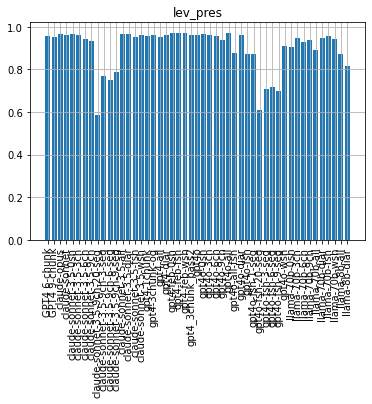

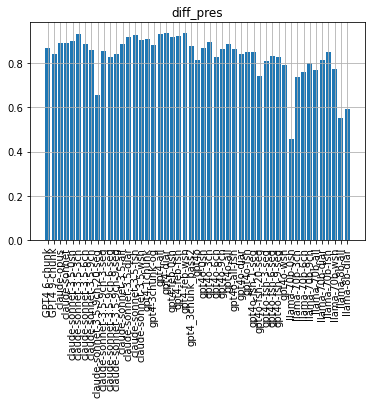

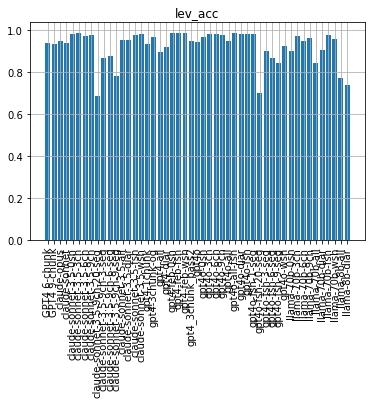

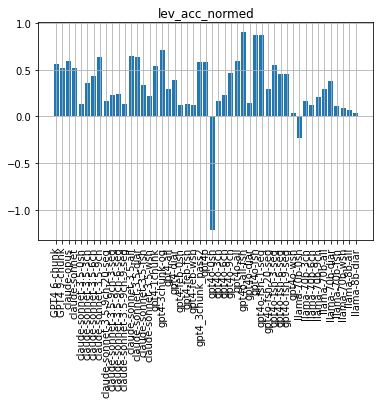

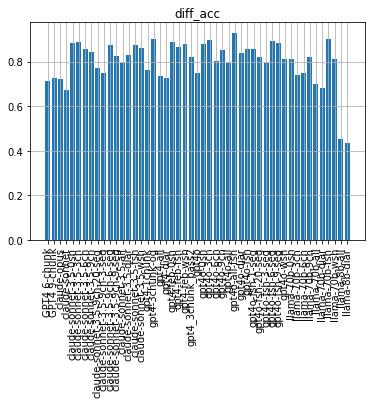

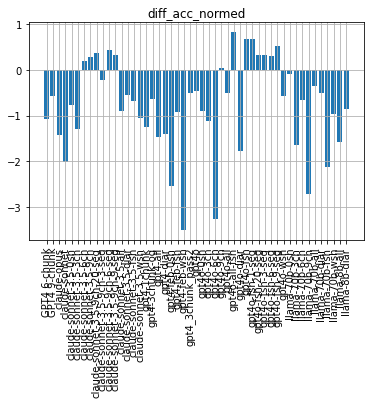

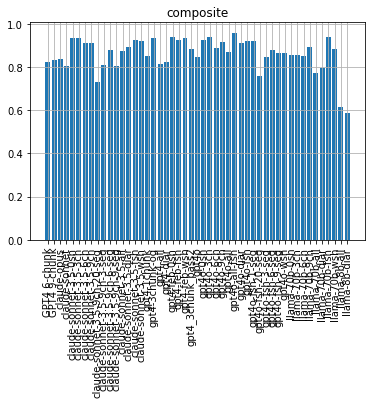

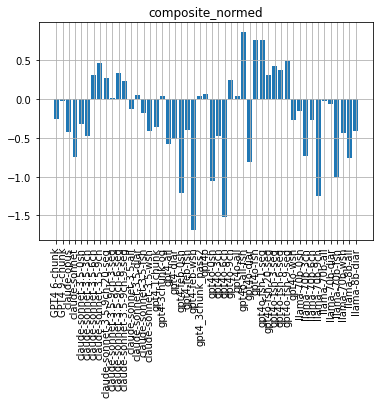

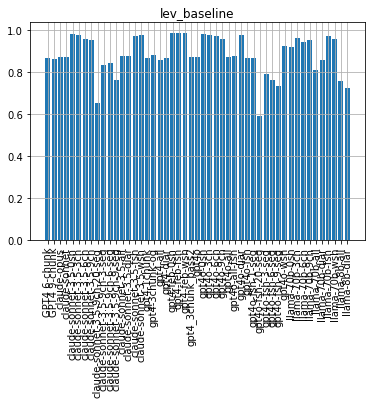

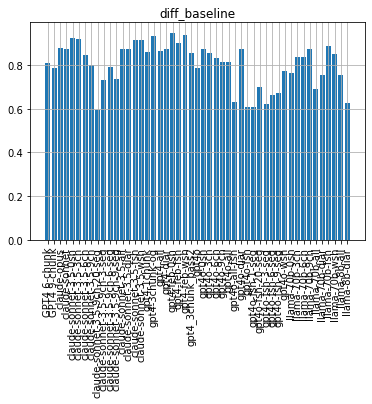

<Figure size 432x288 with 0 Axes>

In [47]:
def plot_all():    
    for col_name in col_names[1:-1]:
        plt.bar(means.index, means[col_name])
        plt.xticks(rotation='vertical')
        plt.title(col_name)
        plt.grid(True)
        plt.figure()
        plt.plot

    plt.show()
plot_all()

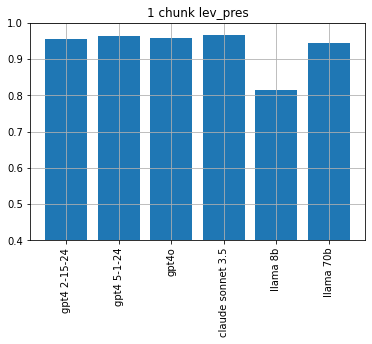

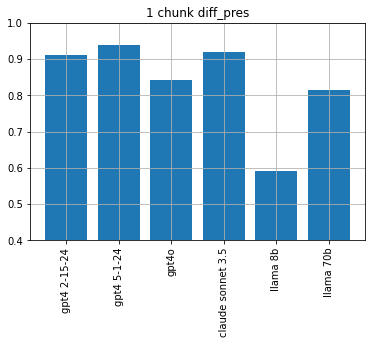

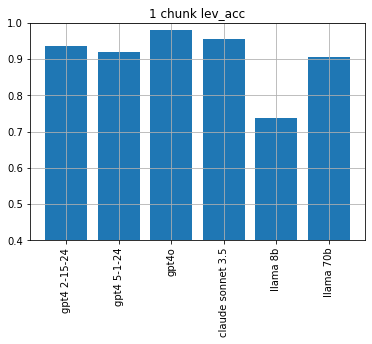

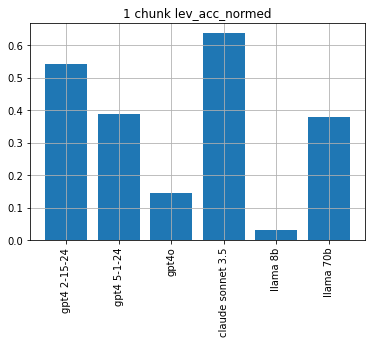

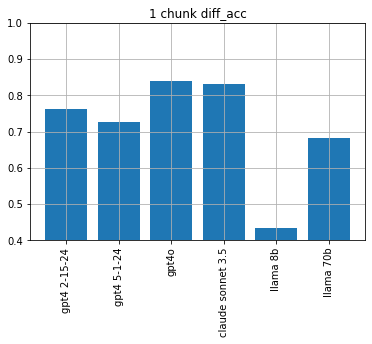

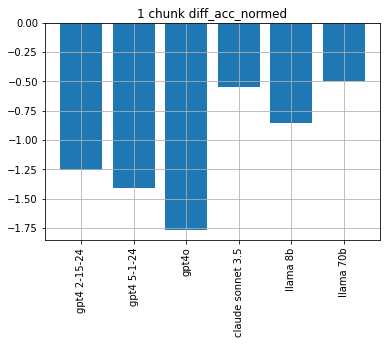

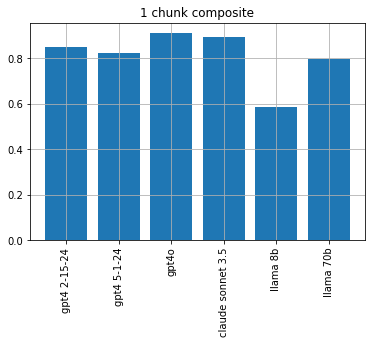

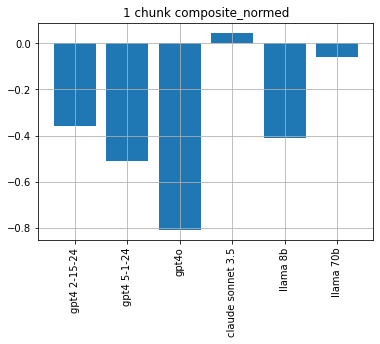

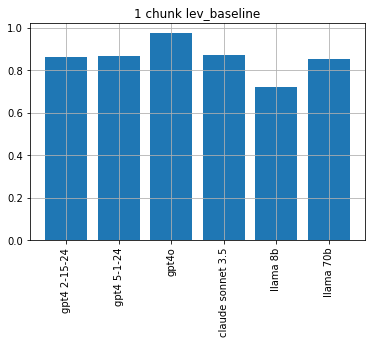

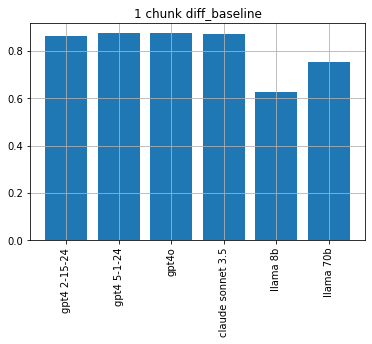

<Figure size 432x288 with 0 Axes>

In [48]:
def plot_1ch():

    run_names = [
        'gpt4-1chunk',
        'gpt4-diar',
        'gpt4o-diar',
        'claude-sonnet-3.5-diar',
        'llama-8b-diar',
        'llama-70b-diar'       
    ]

    plot_labels = [
        'gpt4 2-15-24',
        'gpt4 5-1-24',
        'gpt4o',
        'claude sonnet 3.5',
        'llama 8b',
        'llama 70b'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("1 chunk " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_1ch()

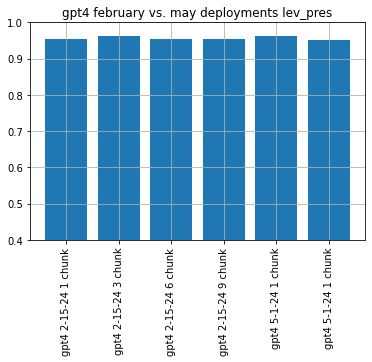

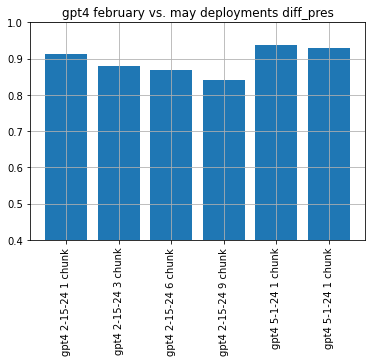

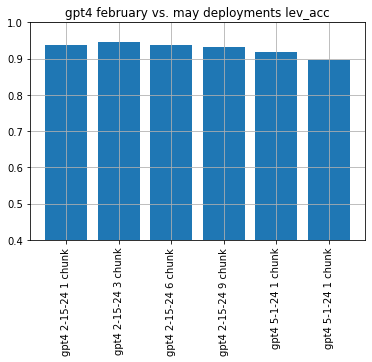

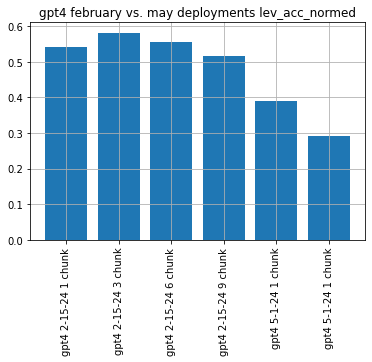

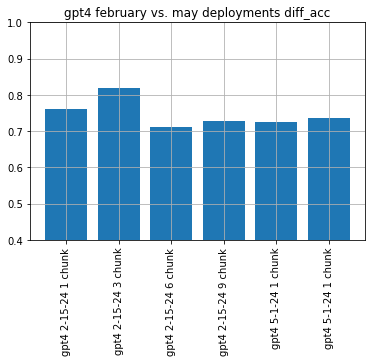

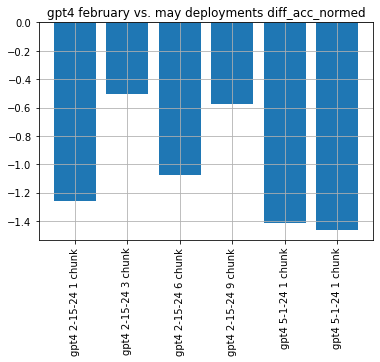

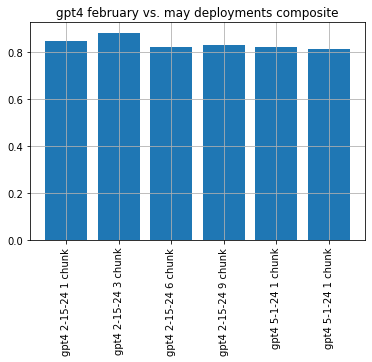

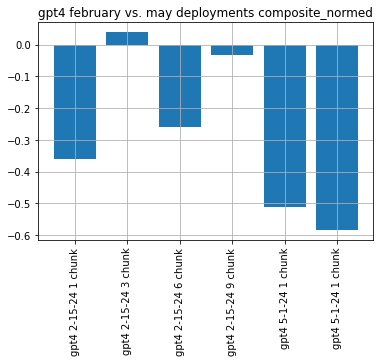

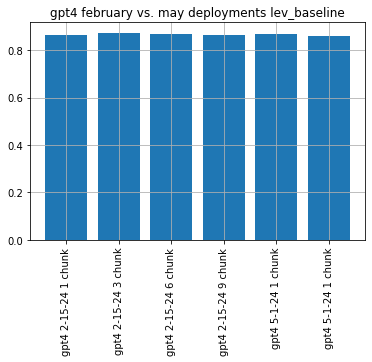

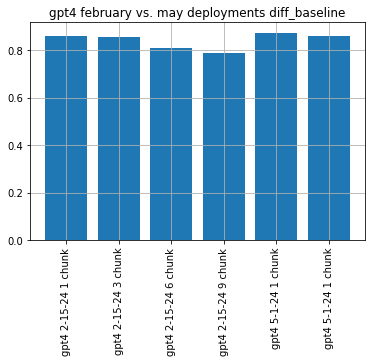

<Figure size 432x288 with 0 Axes>

In [49]:
def plot_gpt4():

    run_names = [
        'gpt4-1chunk',
        'gpt4_3chunk_pass2',
        'GPT4 6-chunk',
        'GPT4 9-chunk',
        'gpt4-diar',
        'gpt4-all'       
    ]

    plot_labels = [
        'gpt4 2-15-24 1 chunk',
        'gpt4 2-15-24 3 chunk',
        'gpt4 2-15-24 6 chunk',
        'gpt4 2-15-24 9 chunk',
        'gpt4 5-1-24 1 chunk',
        'gpt4 5-1-24 1 chunk'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("gpt4 february vs. may deployments " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_gpt4()

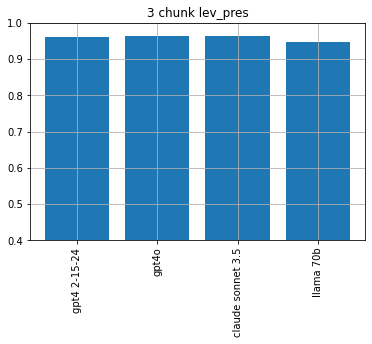

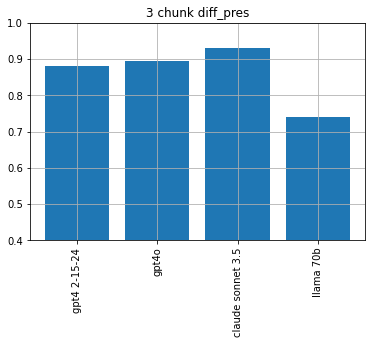

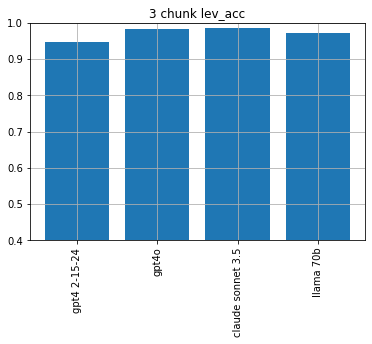

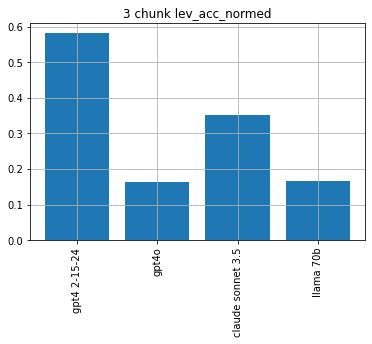

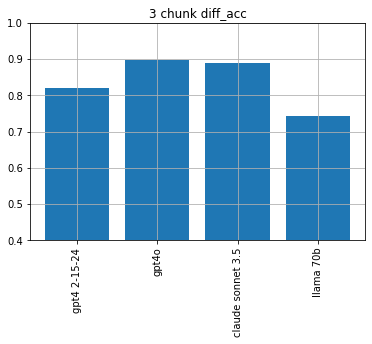

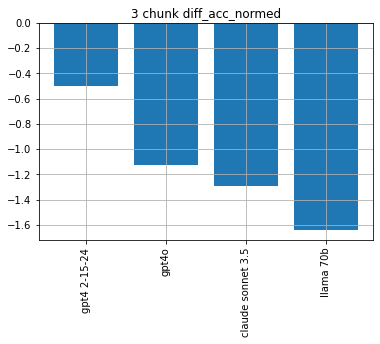

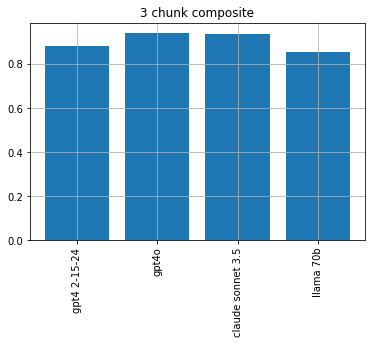

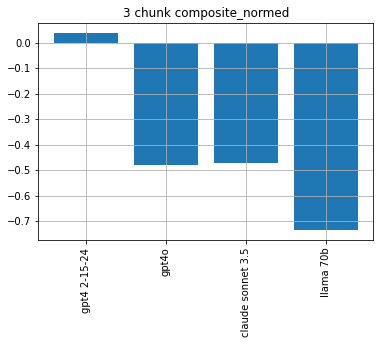

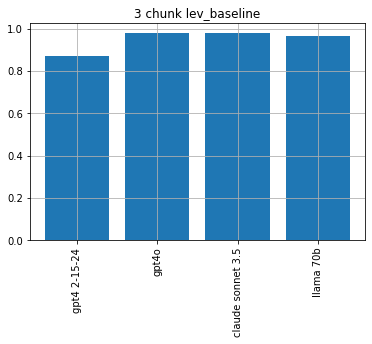

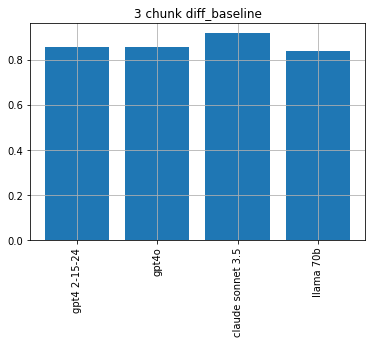

<Figure size 432x288 with 0 Axes>

In [50]:
def plot_3ch():

    run_names = [
        'gpt4_3chunk_pass2',
        'gpt4o-3ch',
        'claude-sonnet-3.5-3ch',
        'llama-70b-3ch'       
    ]

    plot_labels = [
        'gpt4 2-15-24',
        'gpt4o',
        'claude sonnet 3.5',
        'llama 70b'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("3 chunk " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_3ch()

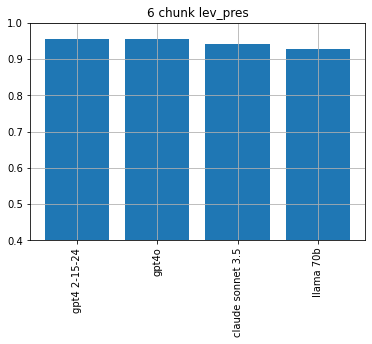

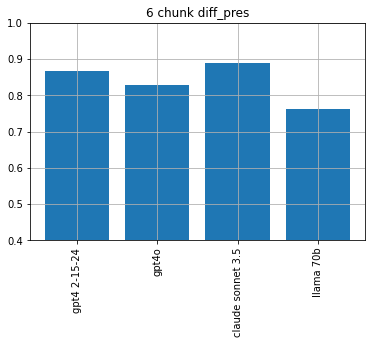

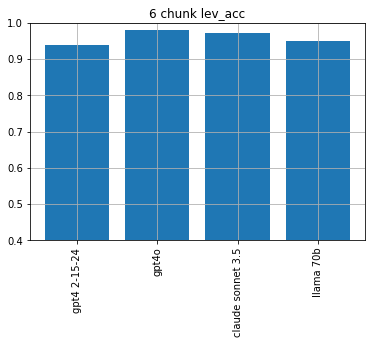

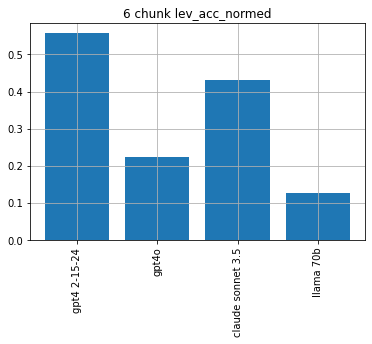

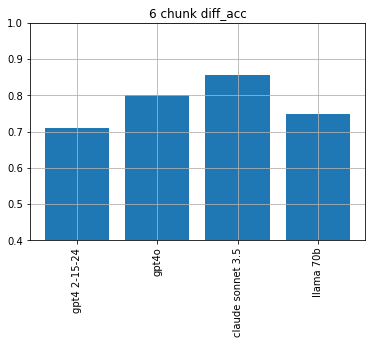

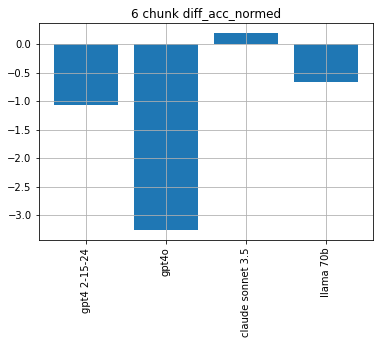

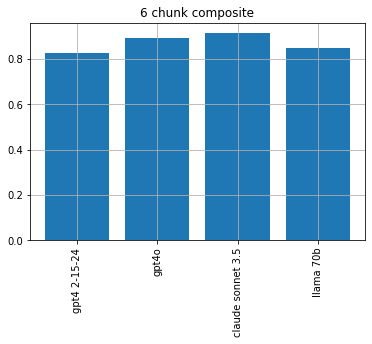

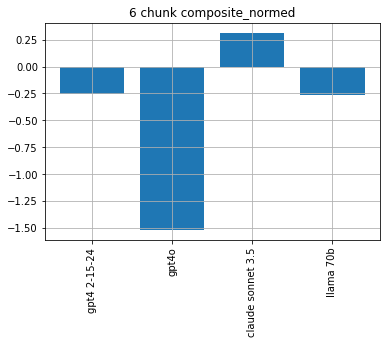

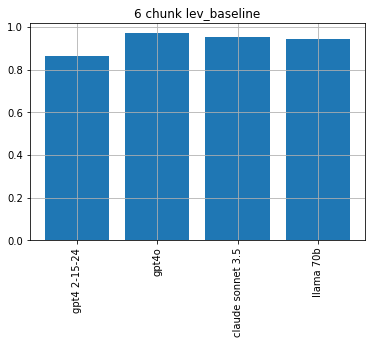

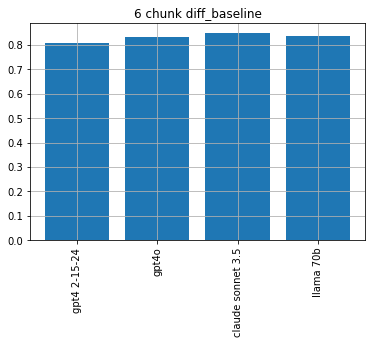

<Figure size 432x288 with 0 Axes>

In [51]:
def plot_6ch():

    run_names = [
        'GPT4 6-chunk',
        'gpt4o-6ch',
        'claude-sonnet-3.5-6ch',
        'llama-70b-6ch'       
    ]

    plot_labels = [
        'gpt4 2-15-24',
        'gpt4o',
        'claude sonnet 3.5',
        'llama 70b'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("6 chunk " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_6ch()

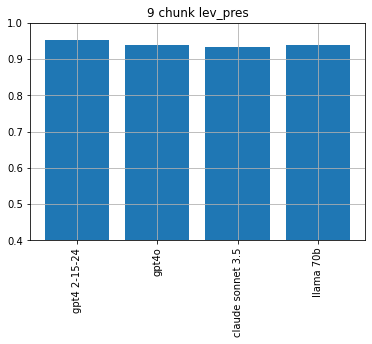

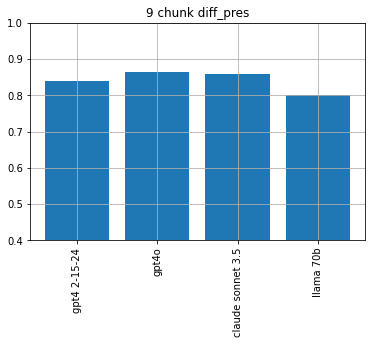

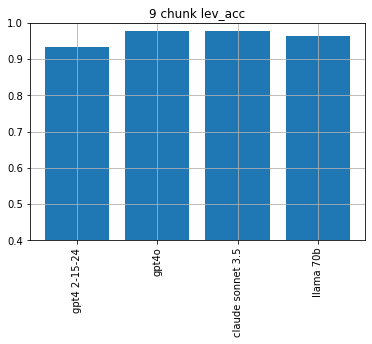

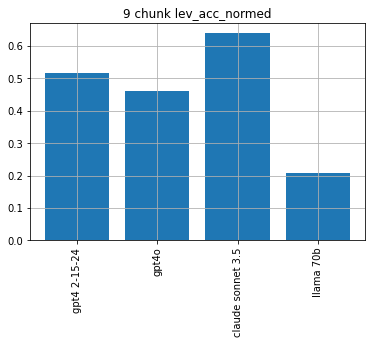

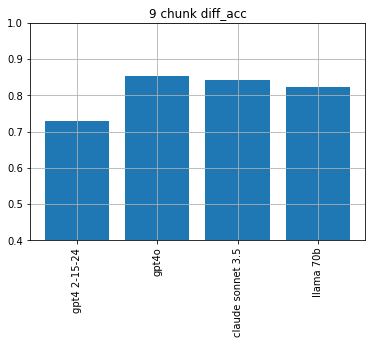

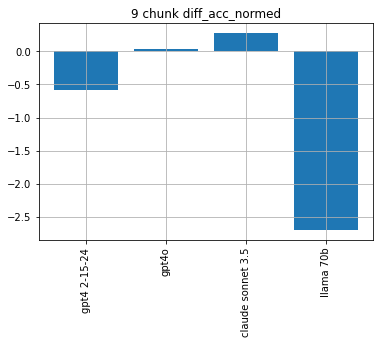

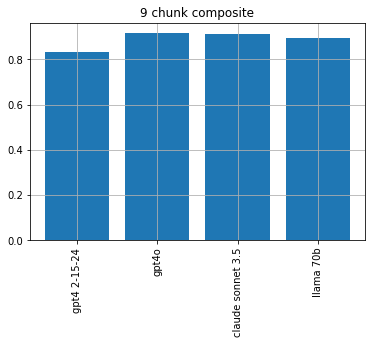

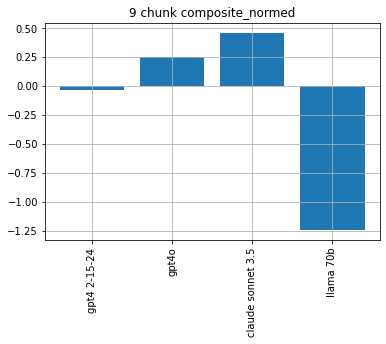

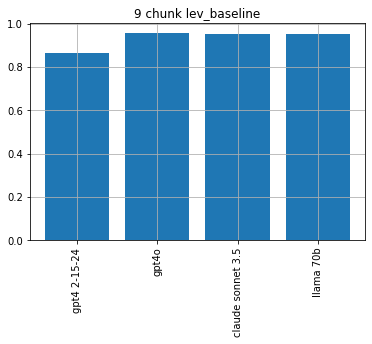

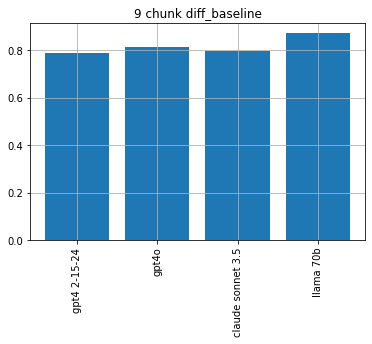

<Figure size 432x288 with 0 Axes>

In [52]:
def plot_9ch():

    run_names = [
        'GPT4 9-chunk',
        'gpt4o-9ch',
        'claude-sonnet-3.5-9ch',
        'llama-70b-9ch'       
    ]

    plot_labels = [
        'gpt4 2-15-24',
        'gpt4o',
        'claude sonnet 3.5',
        'llama 70b'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("9 chunk " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_9ch()

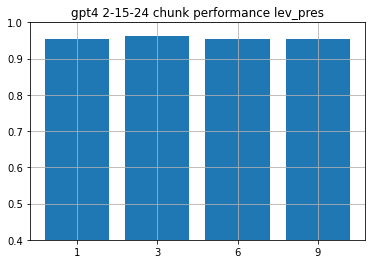

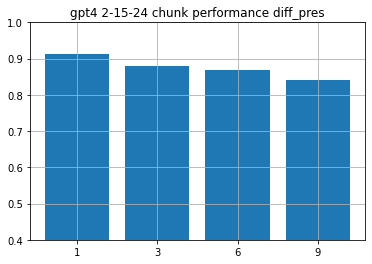

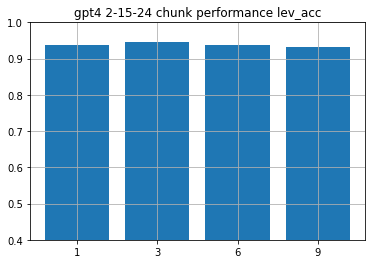

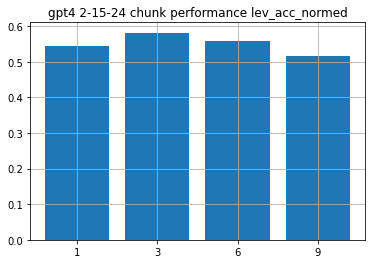

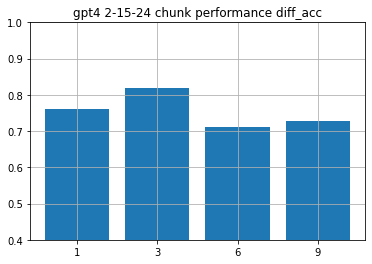

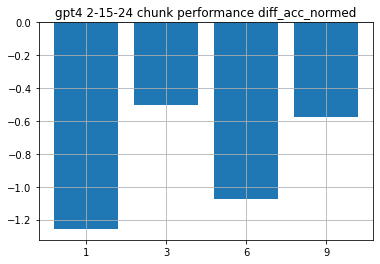

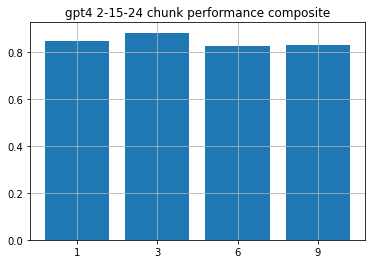

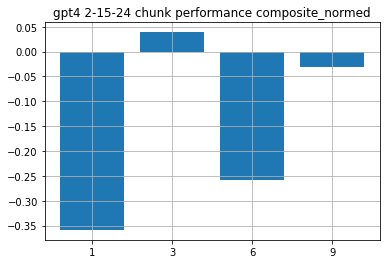

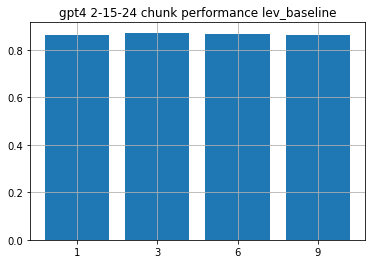

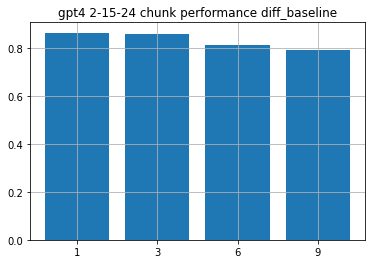

<Figure size 432x288 with 0 Axes>

In [53]:
def plot_gpt4_ch():

    run_names = [
        'gpt4-1chunk',
        'gpt4_3chunk_pass2',
        'GPT4 6-chunk',
        'GPT4 9-chunk',   
    ]

    plot_labels = [
        '1',
        '3',
        '6',
        '9'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='horizontal')
        plt.title("gpt4 2-15-24 chunk performance " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_gpt4_ch()

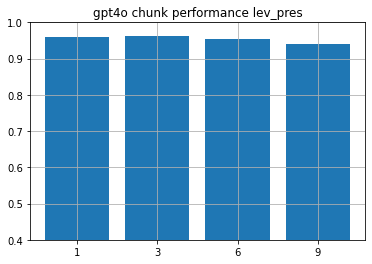

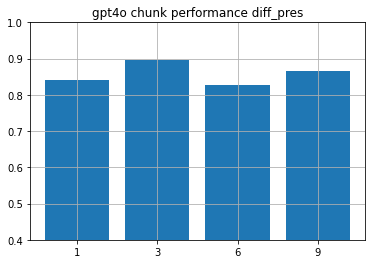

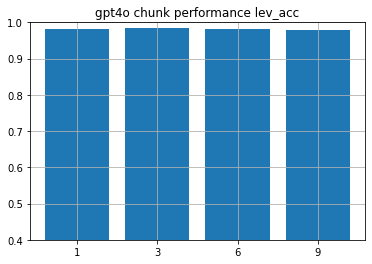

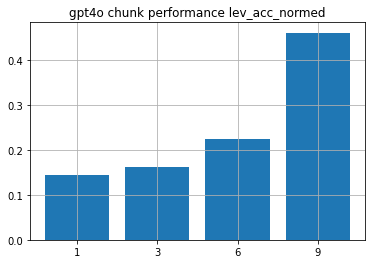

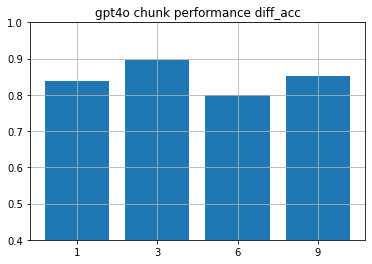

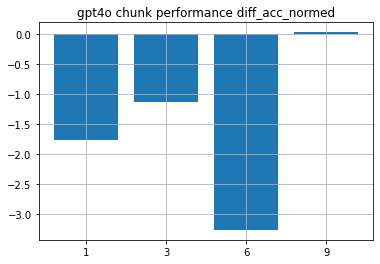

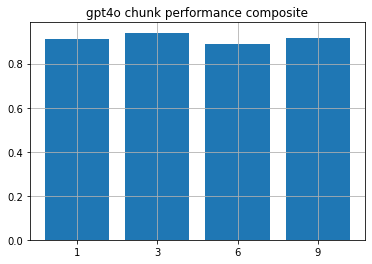

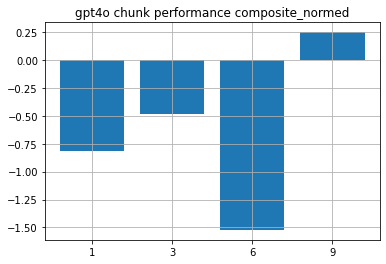

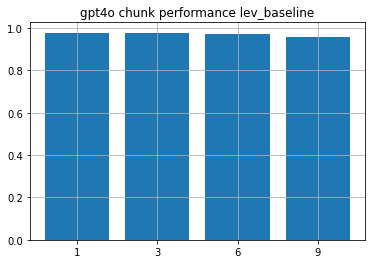

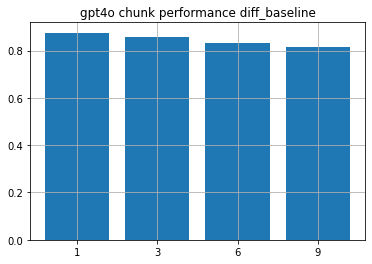

<Figure size 432x288 with 0 Axes>

In [54]:
def plot_gpt4o_ch():

    run_names = [
        'gpt4o-diar',
        'gpt4o-3ch',
        'gpt4o-6ch',
        'gpt4o-9ch',   
    ]

    plot_labels = [
        '1',
        '3',
        '6',
        '9'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='horizontal')
        plt.title("gpt4o chunk performance " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_gpt4o_ch()

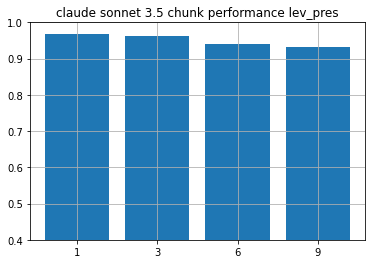

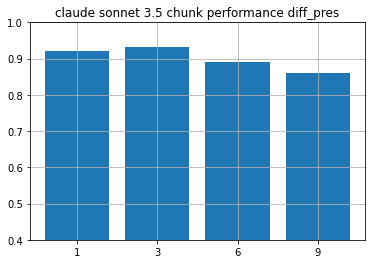

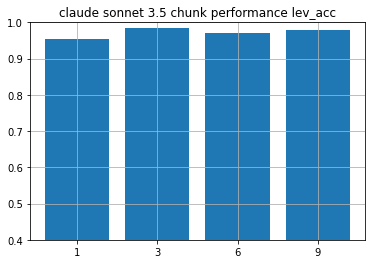

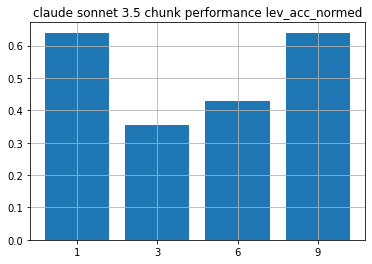

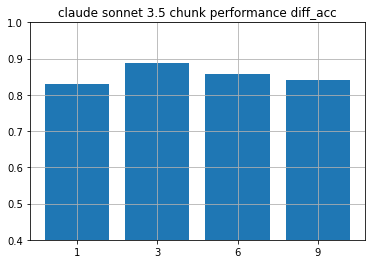

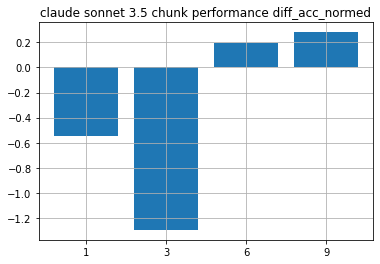

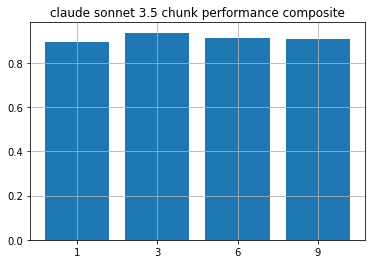

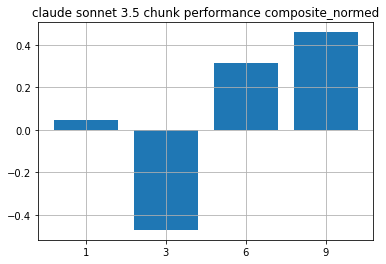

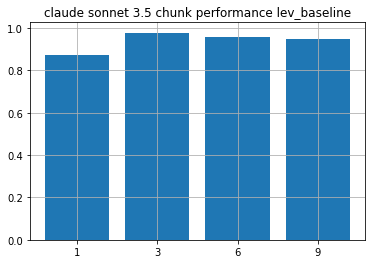

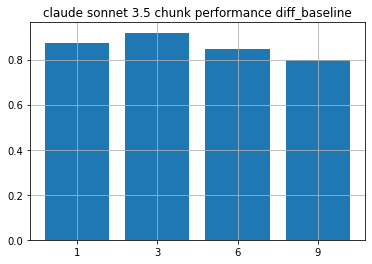

<Figure size 432x288 with 0 Axes>

In [55]:
def plot_claude_ch():

    run_names = [
        'claude-sonnet-3.5-diar',
        'claude-sonnet-3.5-3ch',
        'claude-sonnet-3.5-6ch',
        'claude-sonnet-3.5-9ch',   
    ]

    plot_labels = [
        '1',
        '3',
        '6',
        '9'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='horizontal')
        plt.title("claude sonnet 3.5 chunk performance " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_claude_ch()

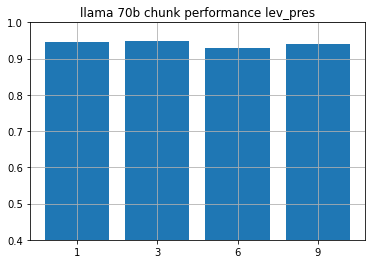

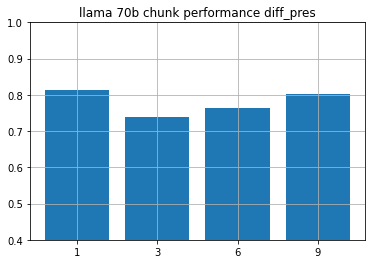

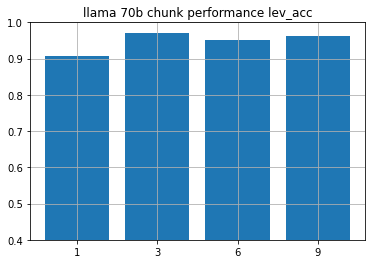

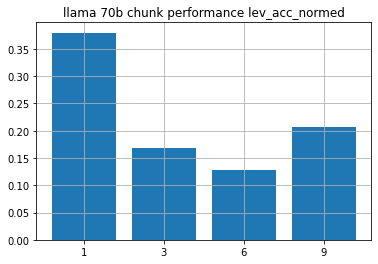

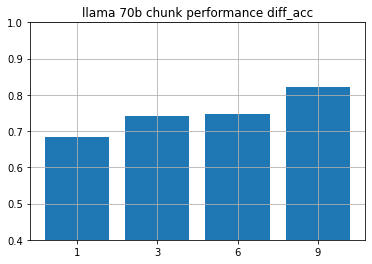

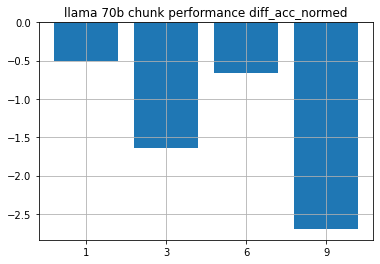

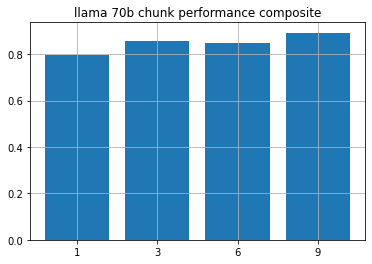

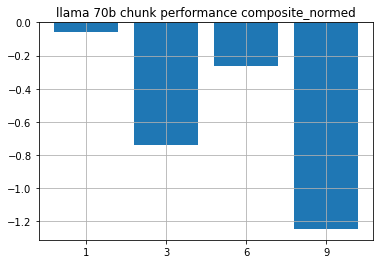

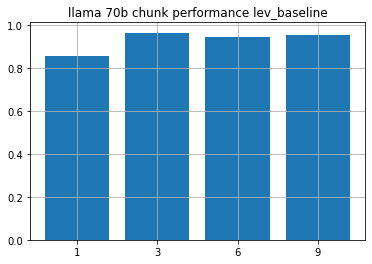

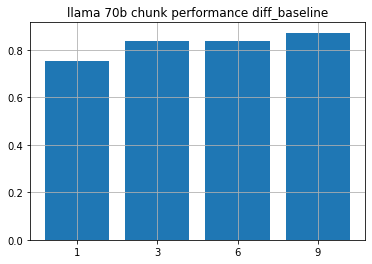

<Figure size 432x288 with 0 Axes>

In [56]:
def plot_llama70_ch():

    run_names = [
        'llama-70b-diar',
        'llama-70b-3ch',
        'llama-70b-6ch',
        'llama-70b-9ch',   
    ]

    plot_labels = [
        '1',
        '3',
        '6',
        '9'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='horizontal')
        plt.title("llama 70b chunk performance " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_llama70_ch()

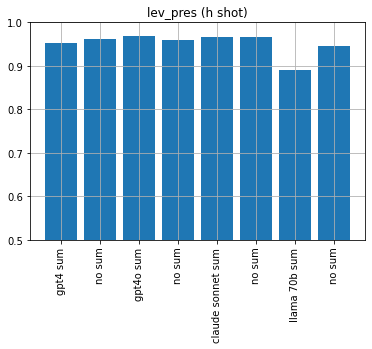

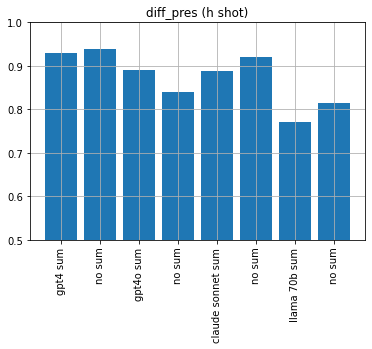

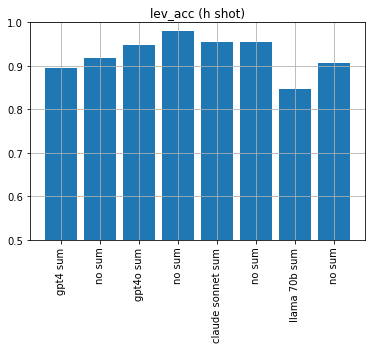

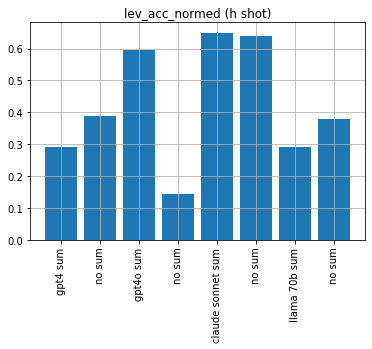

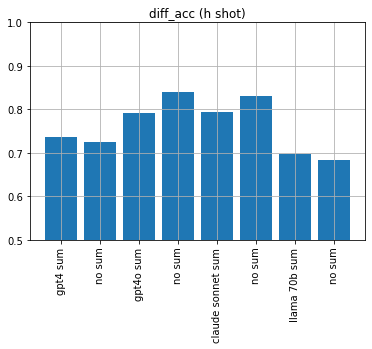

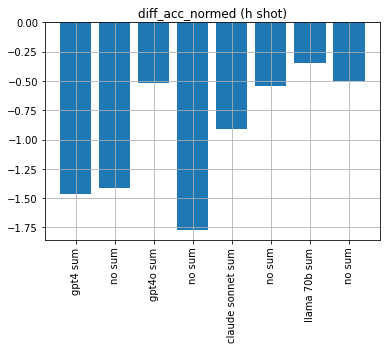

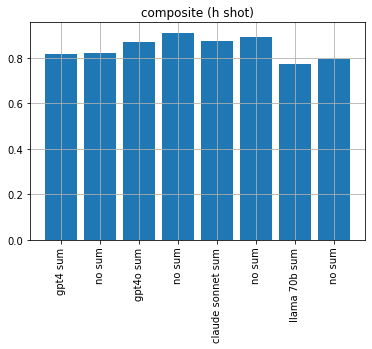

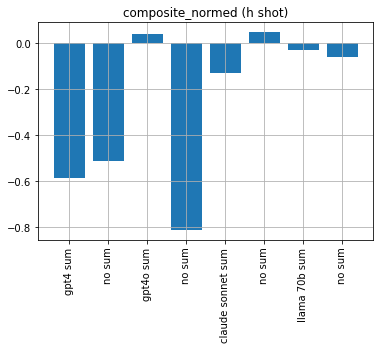

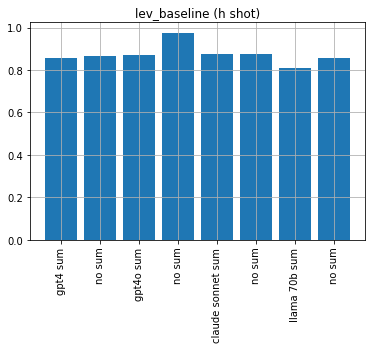

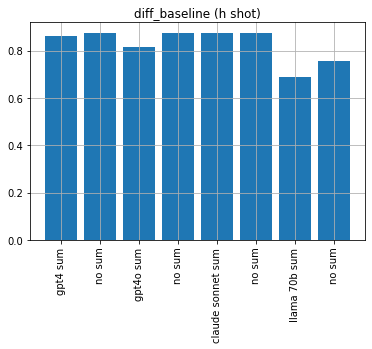

<Figure size 432x288 with 0 Axes>

In [74]:
def plot_summary_comparison():

    run_names = [
        'gpt4-all',
        'gpt4-diar',
        'gpt4o-all',
        'gpt4o-diar',
        'claude-sonnet-3.5-all',
        'claude-sonnet-3.5-diar',
        'llama-70b-all',
        'llama-70b-diar'   
    ]

    plot_labels = [
        'gpt4 sum',
        'no sum',
        'gpt4o sum',
        'no sum',
        'claude sonnet sum',
        'no sum',
        'llama 70b sum',
        'no sum'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title(col_name + " (h shot)")
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.5, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_summary_comparison()

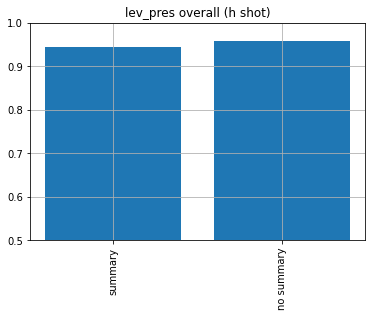

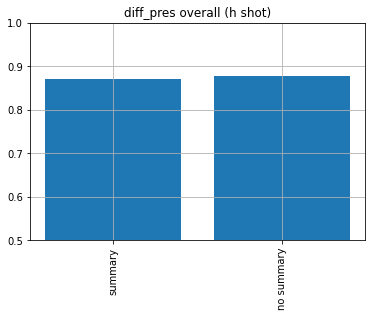

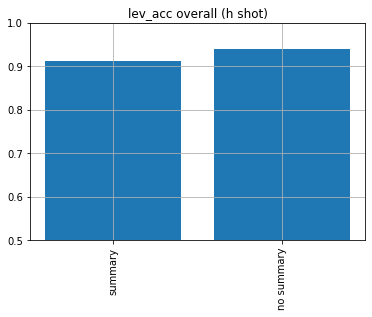

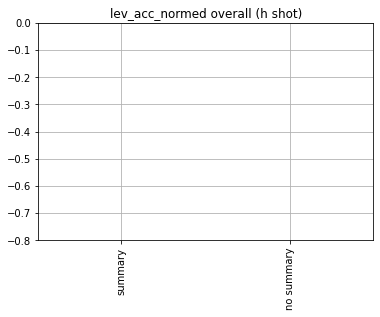

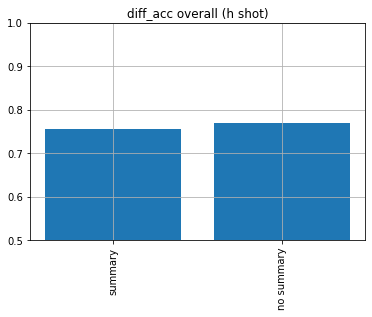

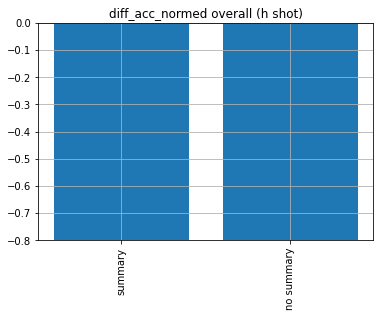

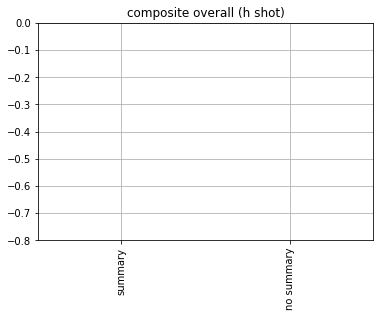

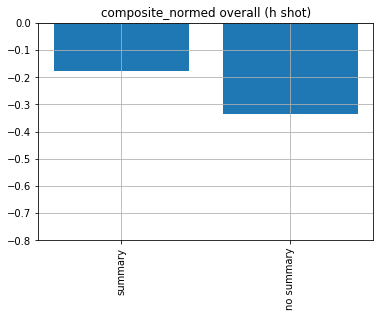

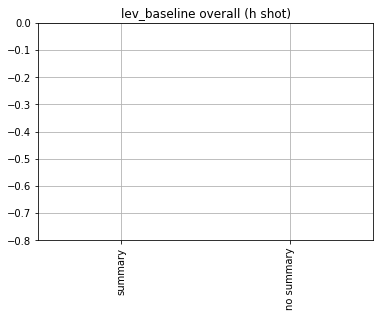

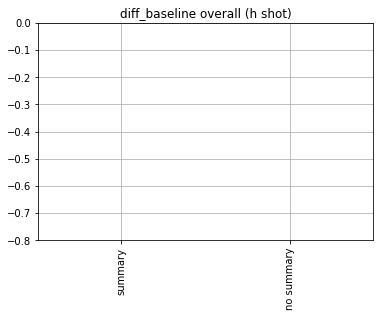

<Figure size 432x288 with 0 Axes>

In [76]:
def plot_summary_comparison():

    run_names = [
        'gpt4-all',
        'gpt4o-all',
        'claude-sonnet-3.5-all',
        'llama-70b-all',
        'gpt4-diar',
        'gpt4o-diar',
        'claude-sonnet-3.5-diar',
        'llama-70b-diar',
    ]

    plot_labels = [
        'summary',
        'no summary'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        summary = np.mean(plot_rows[col_name][run_names[:4]])
        no_summary = np.mean(plot_rows[col_name][run_names[4:]])
        plt.bar(plot_labels, [summary, no_summary])
        plt.xticks(ticks=range(len(plot_labels)), labels=plot_labels, rotation='vertical')
        plt.ylim(-0.8, 0)
        plt.title(col_name + " overall (h shot)")
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.5, 1)
        plt.figure()
        plt.plot

    plt.show()

plot_summary_comparison()

In [59]:
def overall_summary_comparison():
    return 'insert stats for summary vs. no summary overall'
    
overall_summary_comparison()

'insert stats for summary vs. no summary overall'

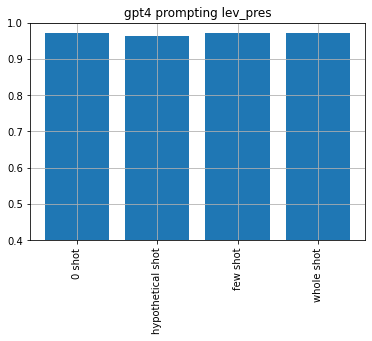

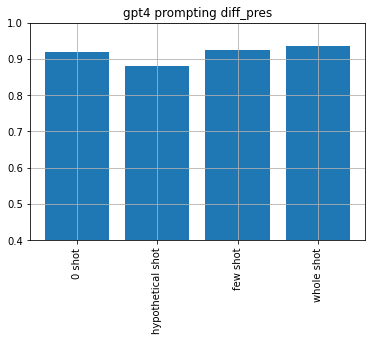

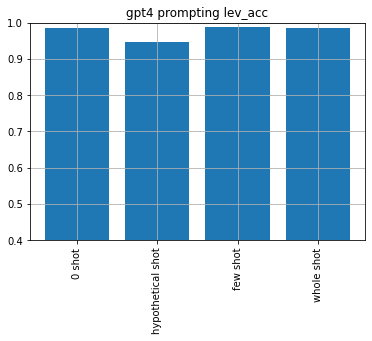

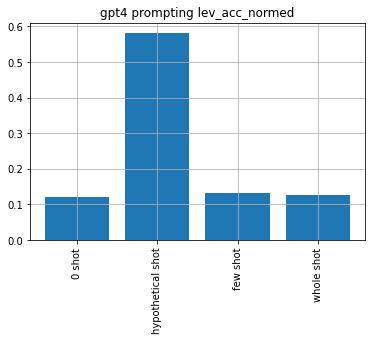

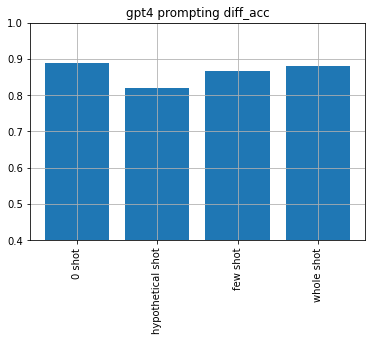

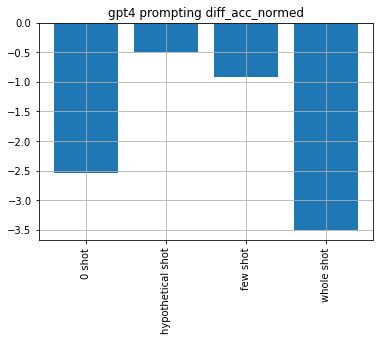

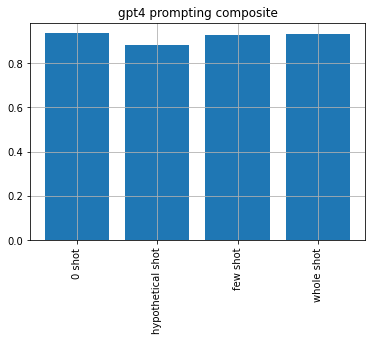

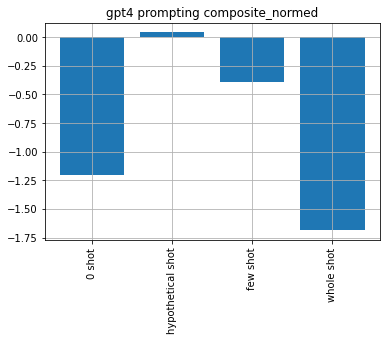

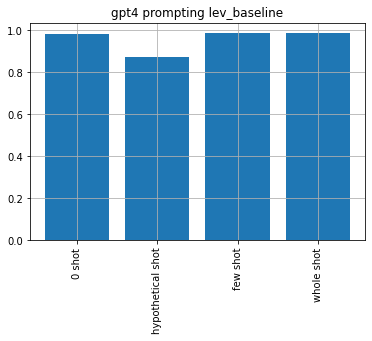

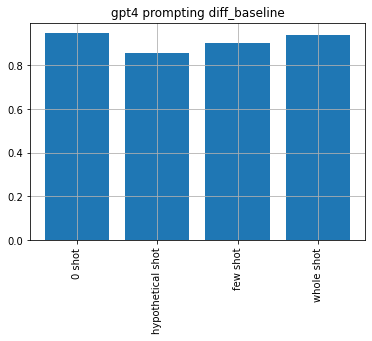

<Figure size 432x288 with 0 Axes>

In [60]:
def plot_gpt4_sh():

    run_names = [
        'gpt4-feb-0sh',
        'gpt4_3chunk_pass2',
        'gpt4-feb-fsh',
        'gpt4-feb-wsh',   
    ]

    plot_labels = [
        '0 shot',
        'hypothetical shot',
        'few shot',
        'whole shot'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("gpt4 prompting " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_gpt4_sh()

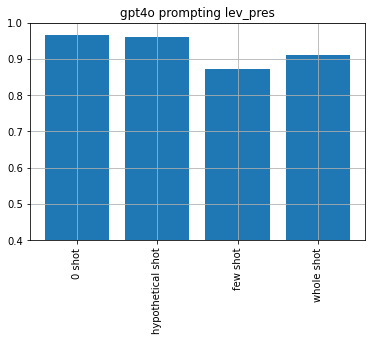

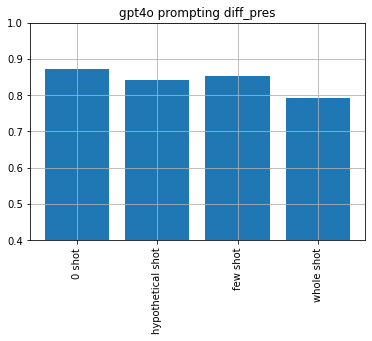

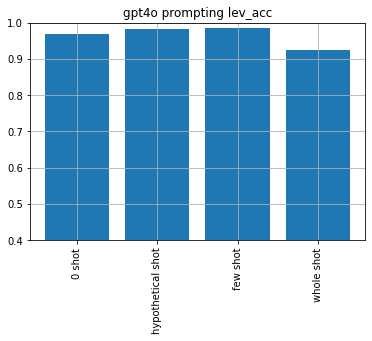

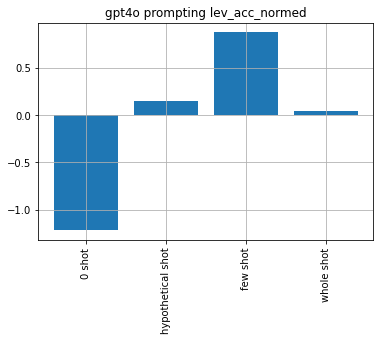

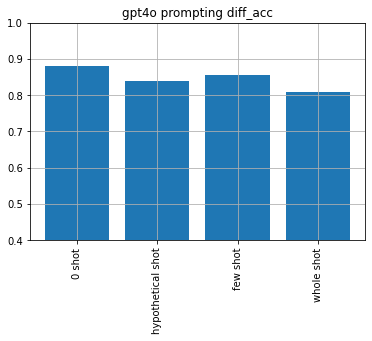

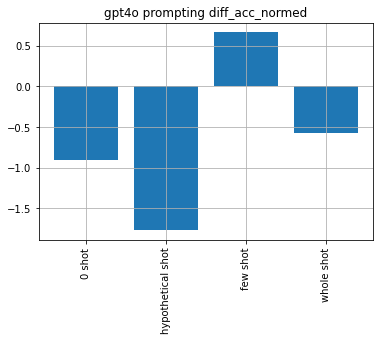

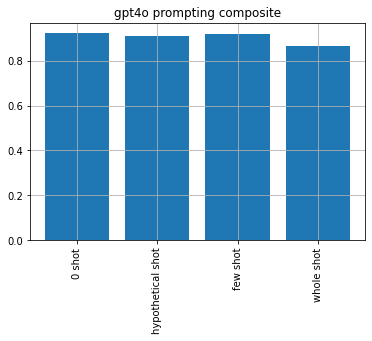

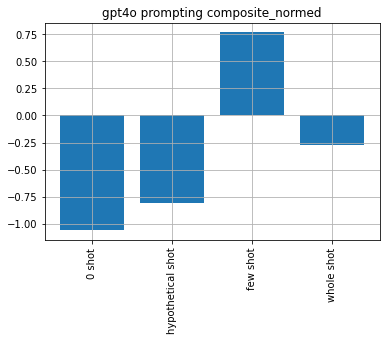

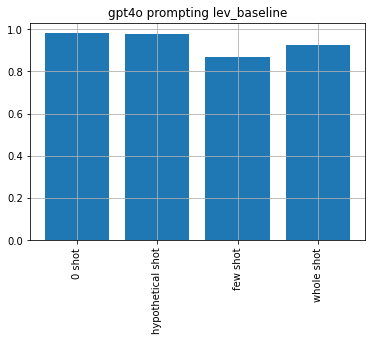

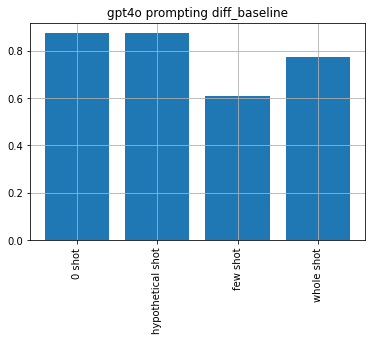

<Figure size 432x288 with 0 Axes>

In [61]:
def plot_gpt4o_sh():

    run_names = [
        'gpt4o-0sh',
        'gpt4o-diar',
        'gpt4o-fsh',
        'gpt4o-wsh',   
    ]

    plot_labels = [
        '0 shot',
        'hypothetical shot',
        'few shot',
        'whole shot'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("gpt4o prompting " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_gpt4o_sh()

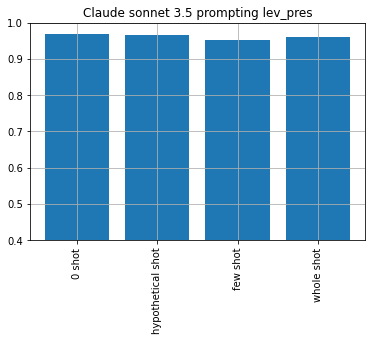

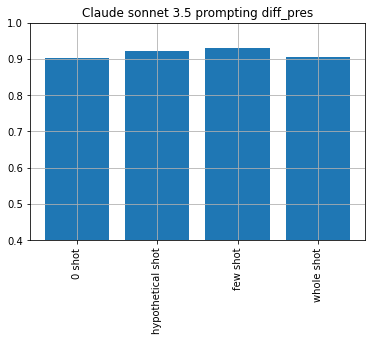

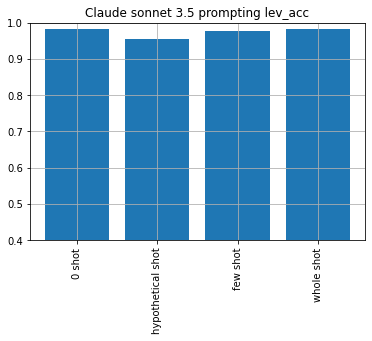

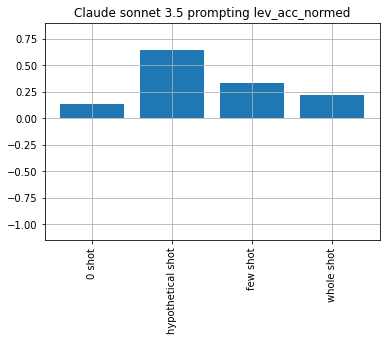

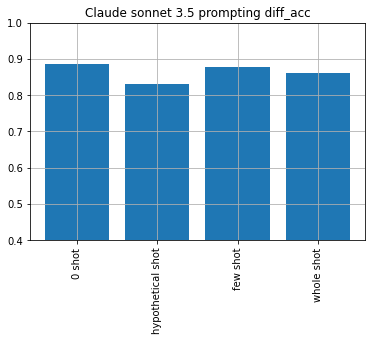

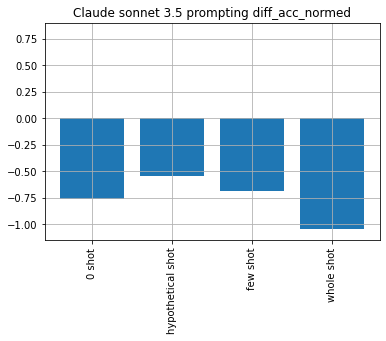

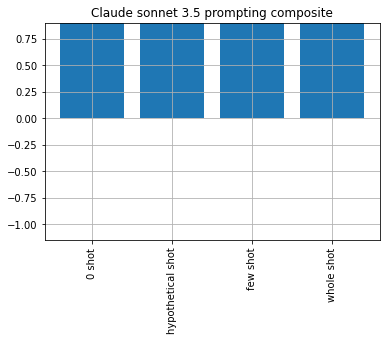

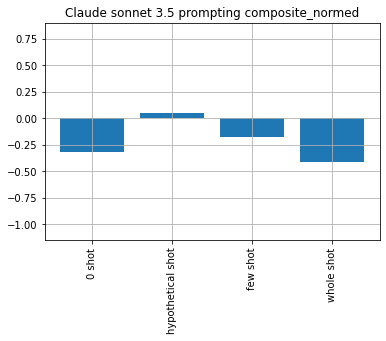

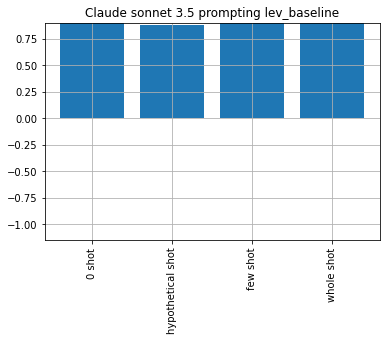

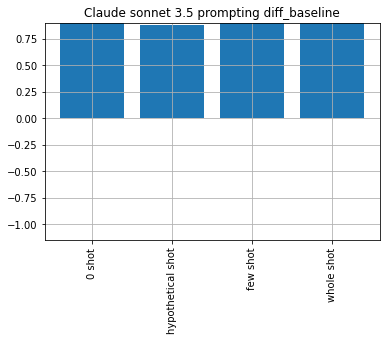

<Figure size 432x288 with 0 Axes>

In [62]:
def plot_claude_sh():

    run_names = [
        'claude-sonnet-3.5-0sh',
        'claude-sonnet-3.5-diar',
        'claude-sonnet-3.5-fsh',
        'claude-sonnet-3.5-wsh',   
    ]

    plot_labels = [
        '0 shot',
        'hypothetical shot',
        'few shot',
        'whole shot'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("Claude sonnet 3.5 prompting " + col_name)
        plt.ylim(-1.15, 0.9)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_claude_sh()

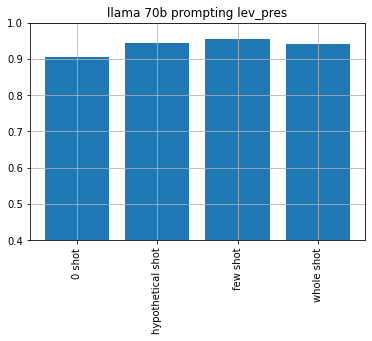

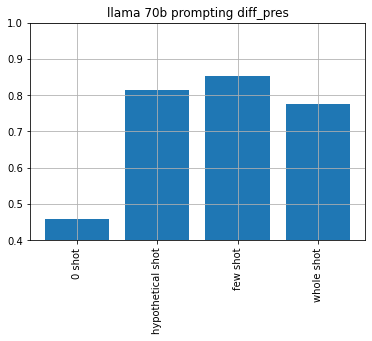

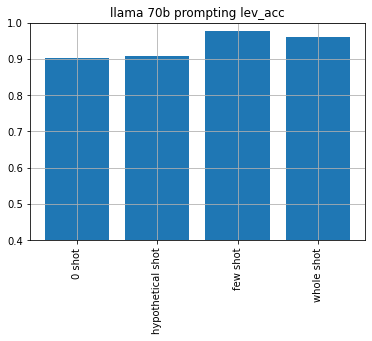

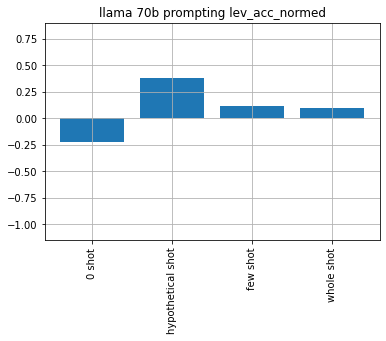

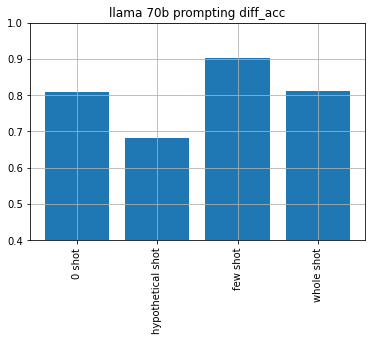

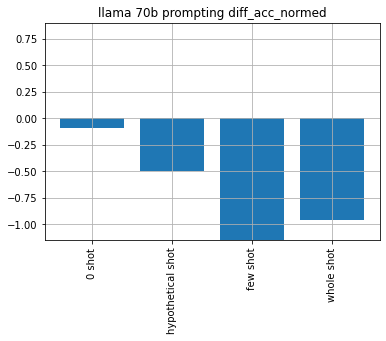

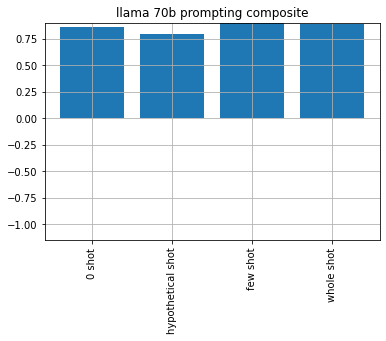

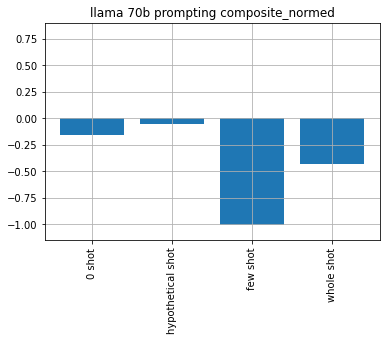

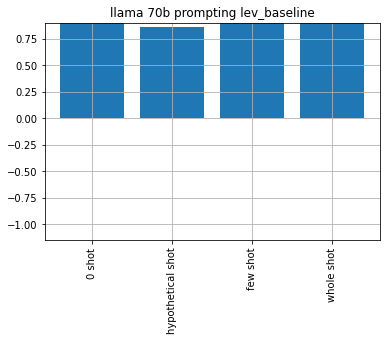

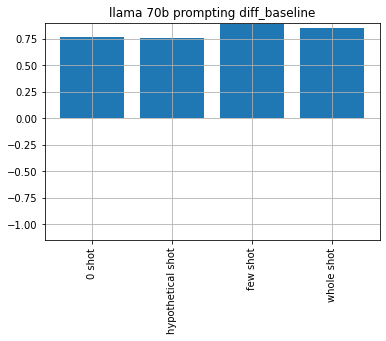

<Figure size 432x288 with 0 Axes>

In [63]:
def plot_llama70_sh():

    run_names = [
        'llama-70b-0sh',
        'llama-70b-diar',
        'llama-70b-fsh',
        'llama-70b-wsh',   
    ]

    plot_labels = [
        '0 shot',
        'hypothetical shot',
        'few shot',
        'whole shot'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("llama 70b prompting " + col_name)
        plt.ylim(-1.15, 0.9)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_llama70_sh()

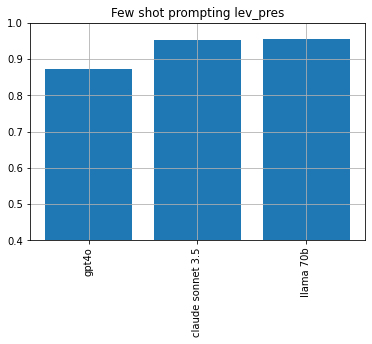

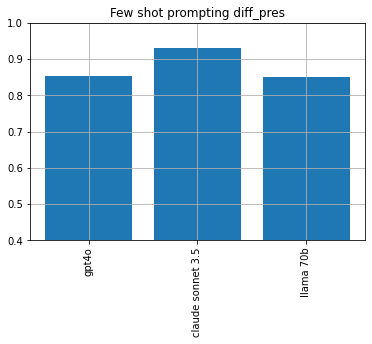

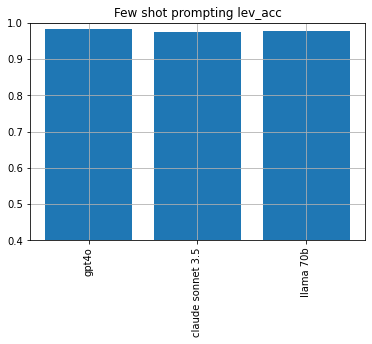

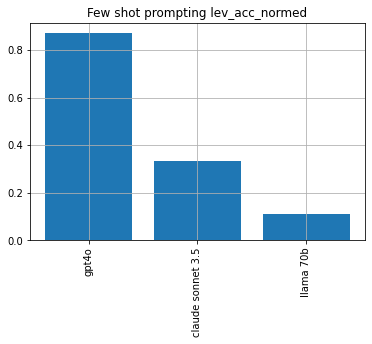

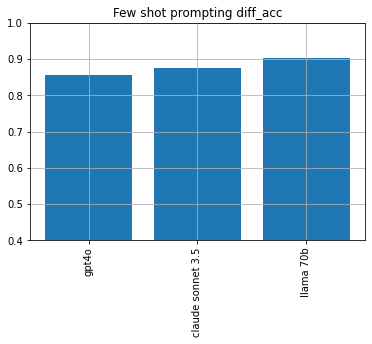

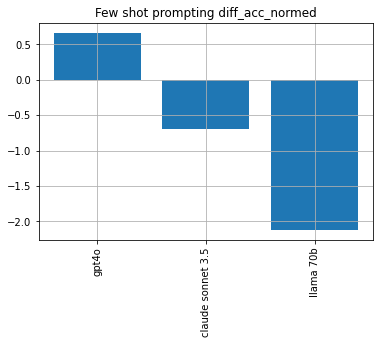

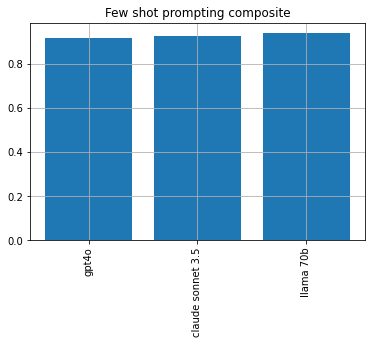

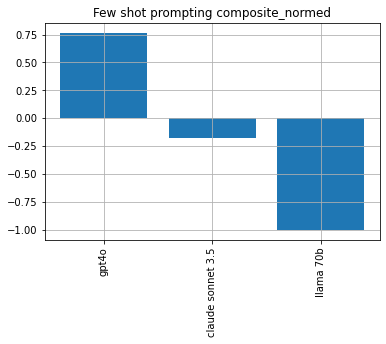

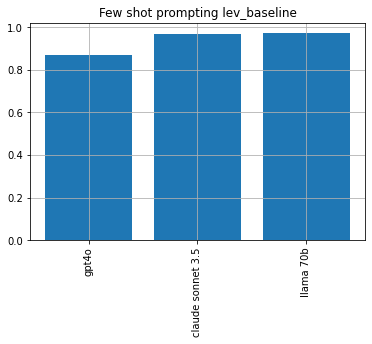

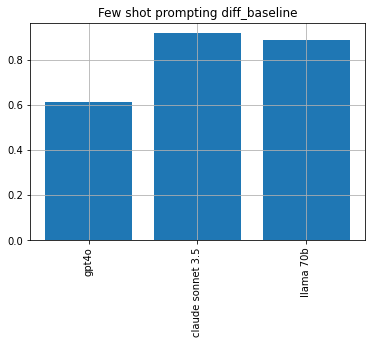

<Figure size 432x288 with 0 Axes>

In [64]:
def plot_fsh():

    run_names = [
        'gpt4o-fsh',
        'claude-sonnet-3.5-fsh',
        'llama-70b-fsh',   
    ]

    plot_labels = [
        'gpt4o',
        'claude sonnet 3.5',
        'llama 70b'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("Few shot prompting " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_fsh()

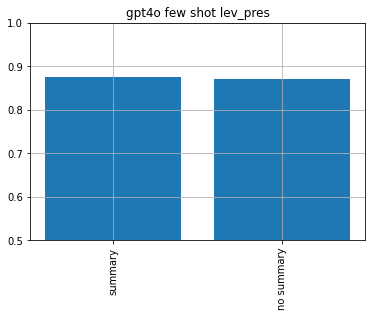

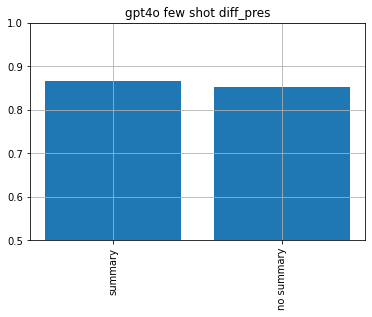

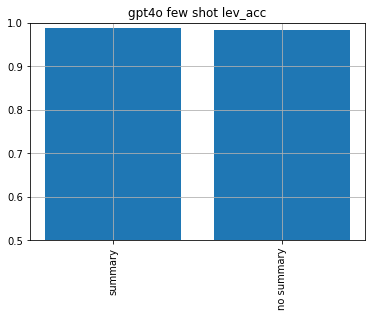

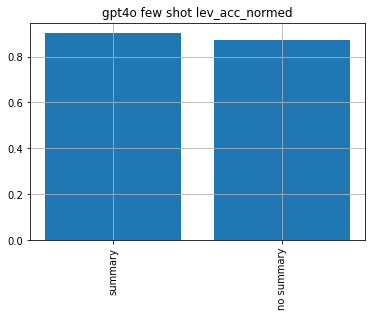

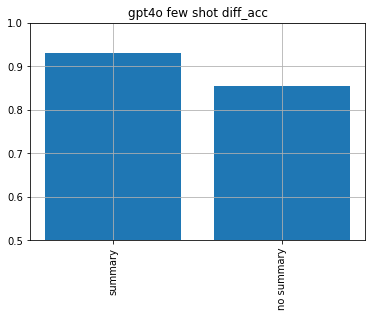

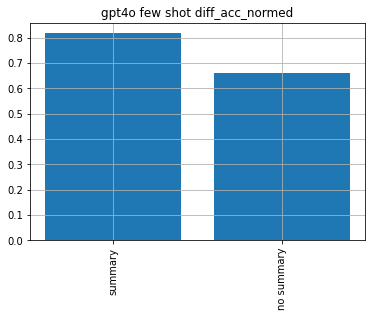

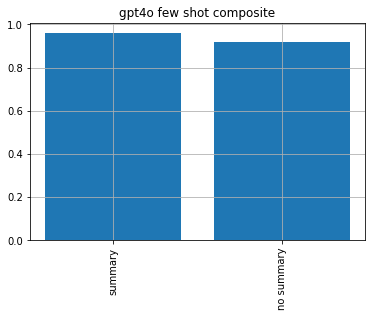

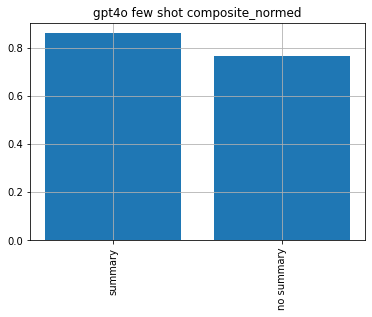

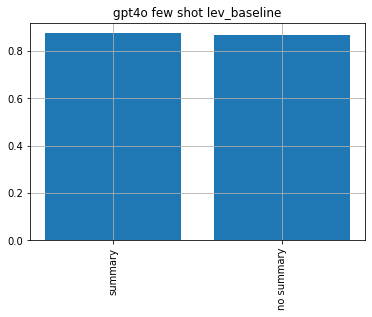

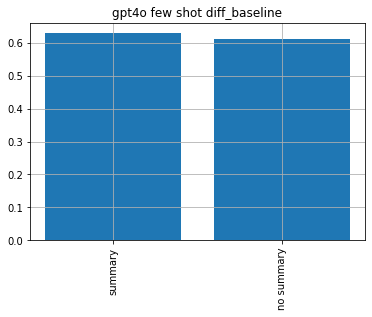

<Figure size 432x288 with 0 Axes>

In [72]:
def plot_summary_comparison():

    run_names = [
        'gpt4o-all-fsh',
        'gpt4o-fsh'
    ]

    plot_labels = [
        'summary',
        'no summary'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        summary = np.mean(plot_rows[col_name][run_names[0]])
        no_summary = np.mean(plot_rows[col_name][run_names[1]])
        plt.bar(plot_labels, [summary, no_summary])
        plt.xticks(ticks=range(len(plot_labels)), labels=plot_labels, rotation='vertical')
        plt.title("gpt4o few shot " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.5, 1)
        plt.figure()
        plt.plot

    plt.show()

plot_summary_comparison()

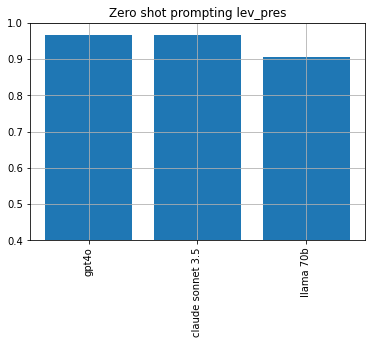

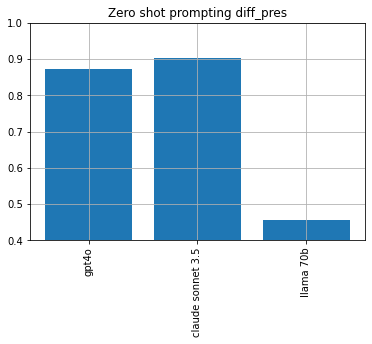

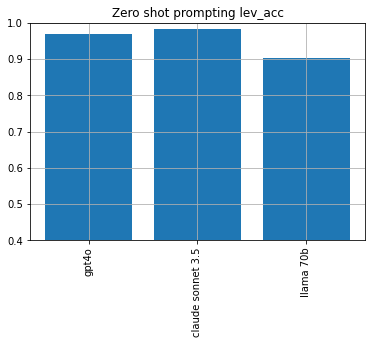

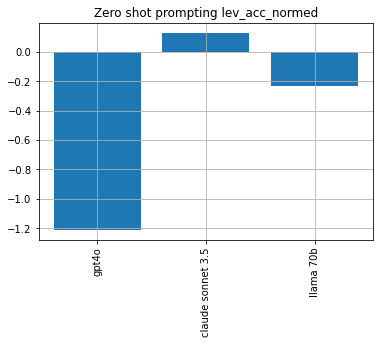

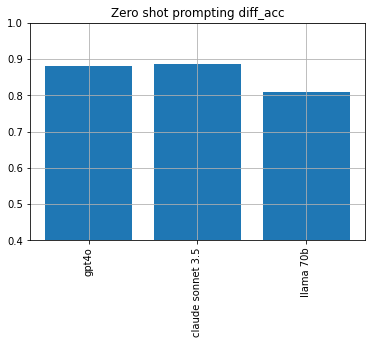

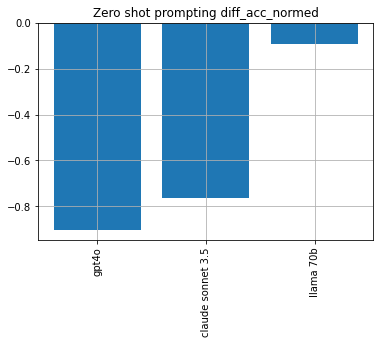

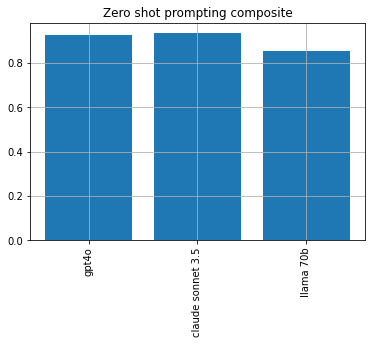

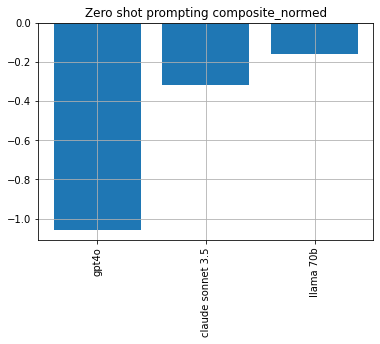

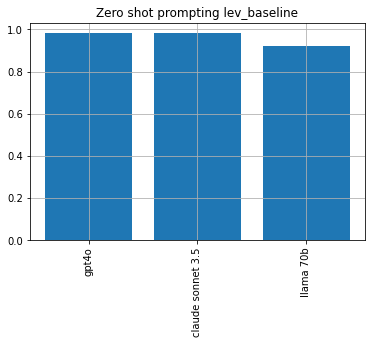

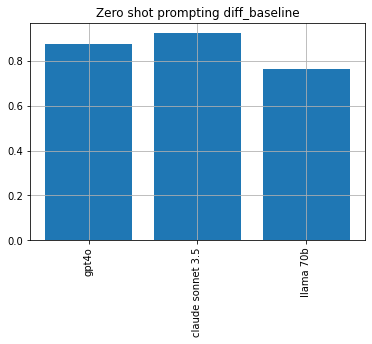

<Figure size 432x288 with 0 Axes>

In [65]:
def plot_0sh():

    run_names = [
        'gpt4o-0sh',
        'claude-sonnet-3.5-0sh',
        'llama-70b-0sh',   
    ]

    plot_labels = [
        'gpt4o',
        'claude sonnet 3.5',
        'llama 70b'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("Zero shot prompting " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_0sh()

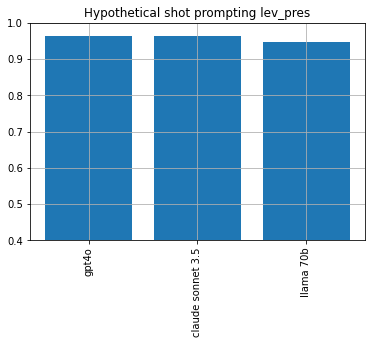

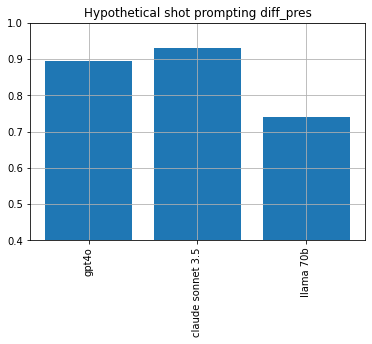

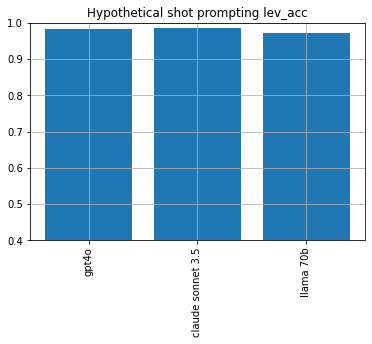

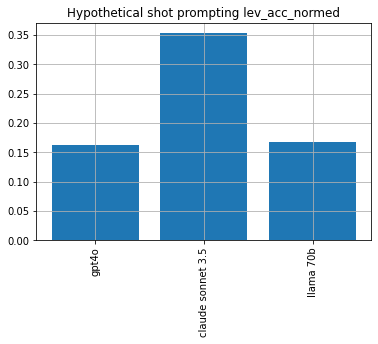

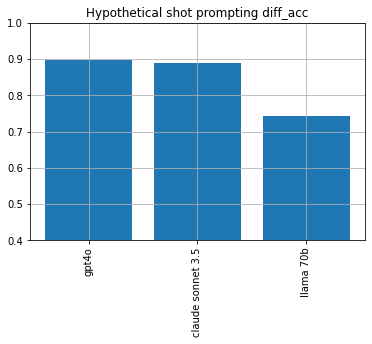

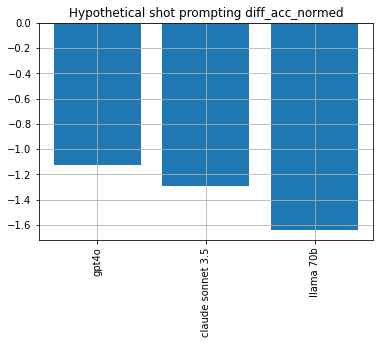

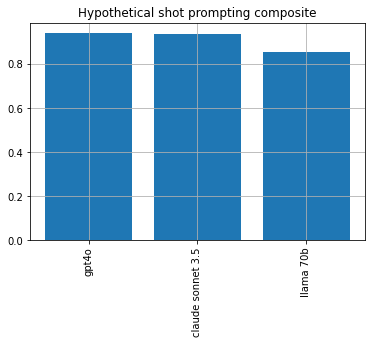

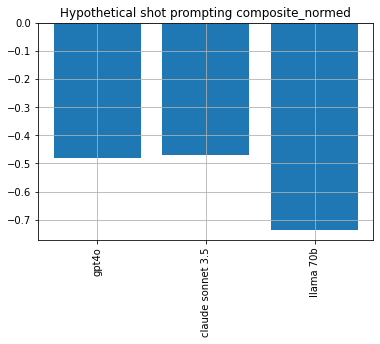

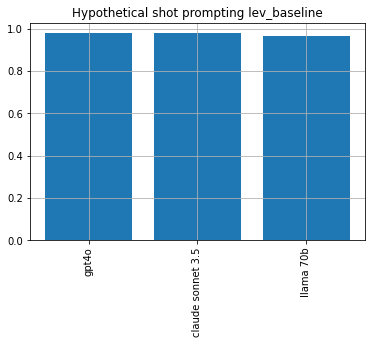

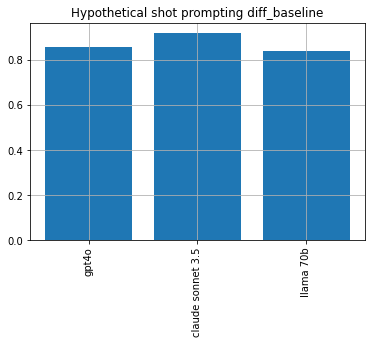

<Figure size 432x288 with 0 Axes>

In [66]:
def plot_hsh():

    run_names = [
        'gpt4o-3ch',
        'claude-sonnet-3.5-3ch',
        'llama-70b-3ch',   
    ]

    plot_labels = [
        'gpt4o',
        'claude sonnet 3.5',
        'llama 70b'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("Hypothetical shot prompting " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_hsh()

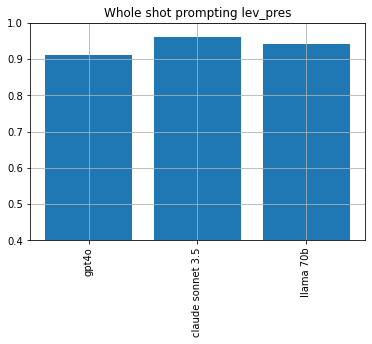

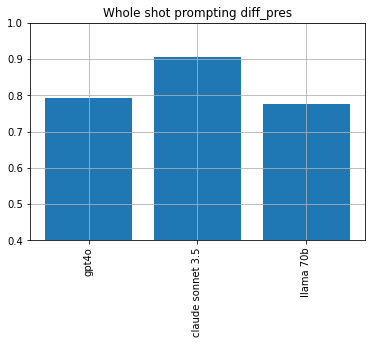

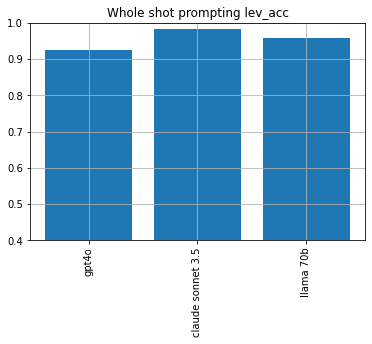

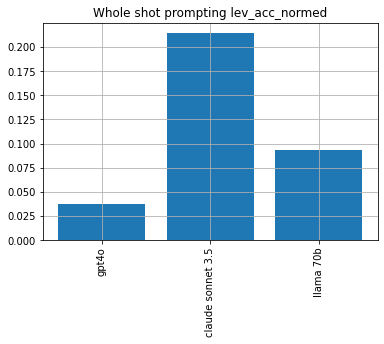

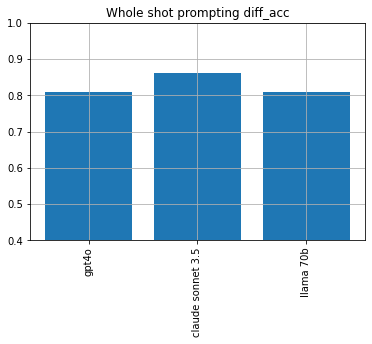

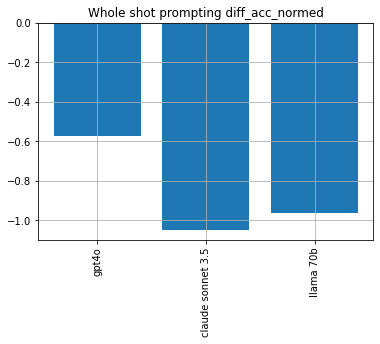

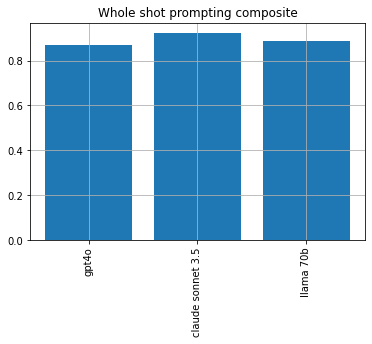

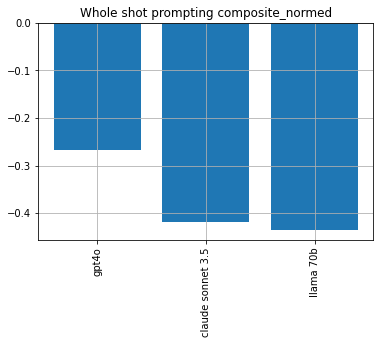

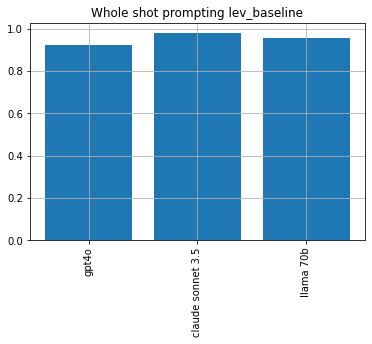

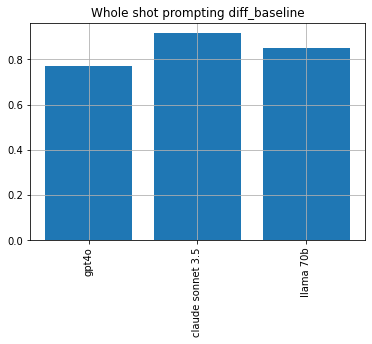

<Figure size 432x288 with 0 Axes>

In [67]:
def plot_wsh():

    run_names = [
        'gpt4o-wsh',
        'claude-sonnet-3.5-wsh',
        'llama-70b-wsh',   
    ]

    plot_labels = [
        'gpt4o',
        'claude sonnet 3.5',
        'llama 70b'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("Whole shot prompting " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_wsh()

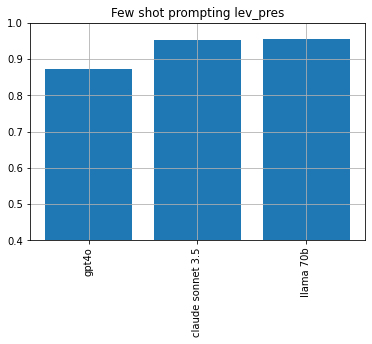

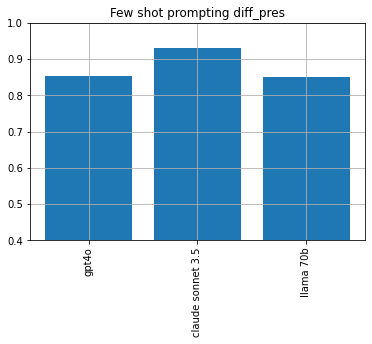

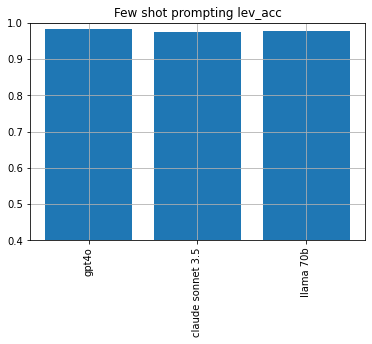

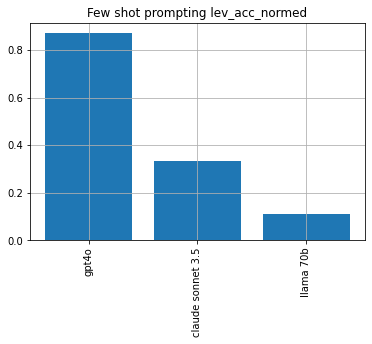

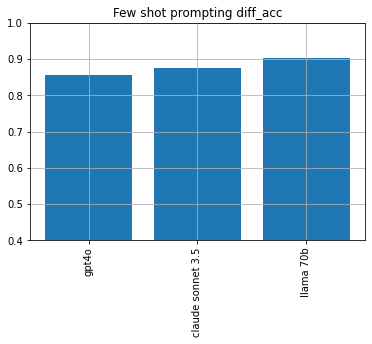

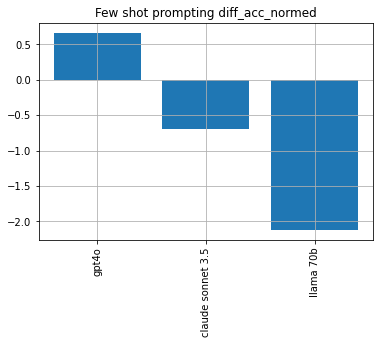

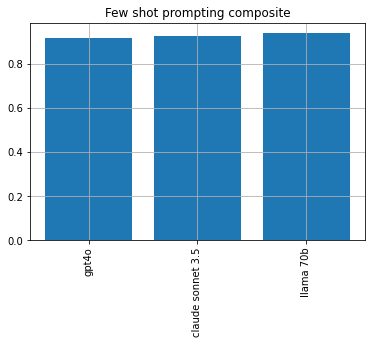

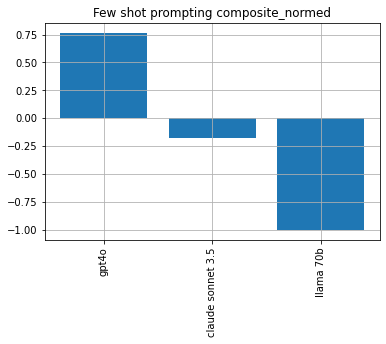

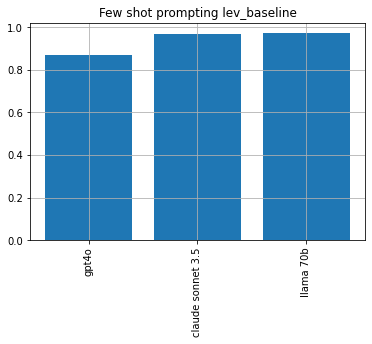

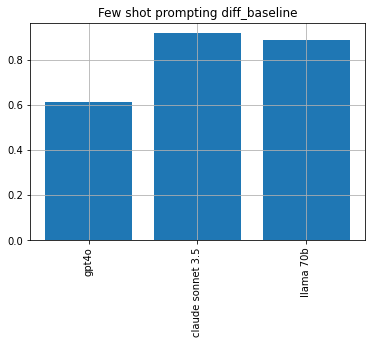

<Figure size 432x288 with 0 Axes>

In [68]:
def best_of_each():

    run_names = [
        'gpt4o-fsh',
        'claude-sonnet-3.5-diar',
        'llama-70b-fsh',   
    ]

    plot_labels = [
        'gpt4o',
        'claude sonnet 3.5',
        'llama 70b'
    ]
    
    plot_rows = means.loc[run_names]
    
    for col_name in col_names[1:-1]:
        plt.bar(run_names, plot_rows[col_name])
        plt.xticks(ticks=range(len(run_names)), labels=plot_labels, rotation='vertical')
        plt.title("Few shot prompting " + col_name)
        plt.grid(True)
        if col_name in ['lev_pres', 'diff_pres', 'lev_acc', 'diff_acc']: plt.ylim(0.4, 1)
        plt.figure()
        plt.plot

    plt.show()
plot_fsh()

In [69]:
df

,ids,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline,run_name
0,01_0542_298135,0.938095,0.968111,0.649452,0.052167,0.793738,0.046594,0.721595,0.049380,0.630159,0.783658,gpt4o-fsh-9-seg
1,02_0036_174595,0.828897,0.911417,0.778970,0.286737,0.877235,0.449089,0.828102,0.367913,0.690114,0.777160,gpt4o-fsh-9-seg
2,03_0028_174553,0.531726,0.725895,0.971731,0.856715,0.984781,0.975877,0.978256,0.916296,0.802711,0.369106,gpt4o-fsh-9-seg
3,04_0043_174686,0.699074,0.841612,0.773626,0.325995,0.872418,0.745121,0.823022,0.535558,0.664137,0.499441,gpt4o-fsh-9-seg
4,05_0033_174804,0.640884,0.781145,0.936407,0.183673,0.957724,-0.043106,0.947065,0.070284,0.922099,0.959471,gpt4o-fsh-9-seg
...,...,...,...,...,...,...,...,...,...,...,...,...
15,06_1048_365209,0.917626,0.909039,0.985893,0.834150,0.926214,0.569674,0.956054,0.701912,0.914944,0.828535,gpt4o-fsh-1-seg
16,07_1111_380134,0.863016,0.902474,0.987839,0.915725,0.989717,0.968876,0.988778,0.942301,0.855696,0.669613,gpt4o-fsh-1-seg
17,08_1044_380133,0.917347,0.870143,0.991611,0.895098,0.988101,0.949957,0.989856,0.922527,0.920026,0.762226,gpt4o-fsh-1-seg
18,09_1039_380193,0.842658,0.697705,0.980605,0.880645,0.753051,0.632096,0.866828,0.756371,0.837502,0.328769,gpt4o-fsh-1-seg


## **evaluating in multiple segments + progression across transcript**

In [82]:
path = '/archive/shared/sim_center/shared/annie/diff_lev_scores/'

# Specify the directory path
directory_path = Path(path)

# Files in directory with seg in name (or however they were saved)
run_names = [f.name[:-5] for f in directory_path.iterdir() if (f.is_file() and 'seg' in f.name)]

# Print the list of file names
print(run_names)

['gpt4o-fsh-9-seg', 'claude-sonnet-3.5-9ch-3-seg', 'claude-sonnet-3.5-9ch-9-seg', 'gpt4o-fsh-20-seg', 'gpt4o-fsh-6-seg', 'claude-sonnet-3.5-9ch-6-seg', 'claude-sonnet-3.5-9ch-20-seg', 'gpt4o-fsh-3-seg', 'gpt4o-fsh-1-seg']


In [83]:
def df_from_file_segments(path: str, run_name: str):

    with open(path + run_name + '.json', 'r') as file:
        data = json.load(file)
    
    ids = np.array(data[0])
    data = data[1]

    lev_pres = np.array([]),
    diff_pres = np.array([]),
    lev_acc = np.array([]),
    lev_acc_normed = np.array([]),
    diff_acc = np.array([]),
    diff_acc_normed = np.array([]),
    lev_baseline = np.array([]),
    diff_baseline = np.array([])

    for id in ids:

        lev_pres = np.append(lev_pres, [data['preservation']['levenshtein'][id][line] for line in data['preservation']['levenshtein'][id]])
        diff_pres = np.append(diff_pres, [data['preservation']['diff'][id][line] for line in data['preservation']['diff'][id]])
        lev_acc = np.append(lev_acc, [data['accuracy']['levenshtein'][id][line] for line in data['accuracy']['levenshtein'][id]])
        lev_acc_normed = np.append(lev_acc_normed, [data['accuracy']['levenshtein_baseline_normed'][id][line] for line in data['accuracy']['levenshtein_baseline_normed'][id]])
        diff_acc = np.append(diff_acc, [data['accuracy']['diff'][id][line] for line in data['accuracy']['diff'][id]])
        diff_acc_normed = np.append(diff_acc_normed, [data['accuracy']['diff_baseline_normed'][id][line] for line in data['accuracy']['diff_baseline_normed'][id]])
        lev_baseline = np.append(lev_baseline, [data['nolabel_baseline']['levenshtein'][id][line] for line in data['nolabel_baseline']['levenshtein'][id]])
        diff_baseline = np.append(diff_baseline, [data['nolabel_baseline']['diff'][id][line] for line in data['nolabel_baseline']['diff'][id]])
    
    num_segs = int(len(lev_pres)/len(ids))

    new_ids = []
    seg_num = []
    for id in ids:
        for num in range(num_segs):
            new_ids.append(id)
            seg_num.append(num)
    ids = new_ids
    
    columns = [ids,
        seg_num,
        lev_pres,
        diff_pres,
        lev_acc,
        lev_acc_normed,
        diff_acc,
        diff_acc_normed,
        (lev_acc + diff_acc)/2,
        (lev_acc_normed + diff_acc_normed)/2,
        lev_baseline,
        diff_baseline,
        np.array([run_name]*len(ids))]

    col_names = [
        'ids',
        'segment',
        'lev_pres',
        'diff_pres',
        'lev_acc',
        'lev_acc_normed',
        'diff_acc',
        'diff_acc_normed',
        'composite',
        'composite_normed',
        'lev_baseline',
        'diff_baseline',
        'run_name'
    ]
    
    df = pd.DataFrame(np.column_stack(columns), columns=col_names)

    return df

In [85]:
df_segs = df_from_file_segments(path, run_names[1])

In [86]:
df_segs

,ids,segment,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline,run_name
0,01_0542_298135,0,0.8308286818376986,0.9117778772951187,0.8469437652811735,0.17403744041885838,0.9183991683991684,0.33297245537909376,0.882671466840171,0.25350494789897604,0.8146934955545156,0.8776649746192894,claude-sonnet-3.5-9ch-3-seg
1,01_0542_298135,1,0.537007874015748,0.740801308258381,0.7313003452243958,0.21133745253882566,0.7231905465288035,0.46912009525951265,0.7272454458765997,0.34022877389916917,0.659297052154195,0.47858366647629924,claude-sonnet-3.5-9ch-3-seg
2,01_0542_298135,2,0.7801064537591483,0.07742415782616788,0.9380245319561007,0.38064516129032255,0.9680213191205863,0.3703294577808354,0.9530229255383436,0.37548730953557896,0.8999354422207876,0.9492136304062909,claude-sonnet-3.5-9ch-3-seg
3,02_0036_174595,0,0.7695483870967742,0.8727013542409123,0.8310316815597075,0.08905109489051077,0.9077468953282082,0.6120827912477824,0.8693892884439578,0.3505669430691466,0.8145139453019226,0.7621835211473731,claude-sonnet-3.5-9ch-3-seg
4,02_0036_174595,1,0.2830247882020709,0.5371530886302597,0.6615384615384615,0.046262315827533006,0.7827521206409048,0.061646207828486704,0.7221452910896832,0.05395426182800986,0.6451209341117599,0.7684797768479776,claude-sonnet-3.5-9ch-3-seg
5,02_0036_174595,2,0.6956087824351298,0.44770857814336074,0.9619629818305315,0.35218540160100653,0.8854777509486029,0.4428865767400074,0.9237203663895672,0.397535989170507,0.9412840984697273,0.7944363853571124,claude-sonnet-3.5-9ch-3-seg
6,03_0028_174553,0,0.6593406593406593,0.8003091986601392,0.7930859176410778,0.07918552036199118,0.8841031453669594,0.10946352343257251,0.8385945315040186,0.09432452189728185,0.775292323335028,0.869857262804366,claude-sonnet-3.5-9ch-3-seg
7,03_0028_174553,1,0.30307328605200945,0.31182212581344904,0.45641025641025645,0.07259580621836594,0.599476439790576,0.031011340435424264,0.5279433481004162,0.0518035733268951,0.41385886840432295,0.5866581551228854,claude-sonnet-3.5-9ch-3-seg
8,03_0028_174553,2,0.5856182100362131,0.07179487179487179,0.8328515111695138,0.07554212043110206,0.9122132161011128,0.9111479600361512,0.8725323636353133,0.49334504023362663,0.8191929643041904,0.011989100817438692,claude-sonnet-3.5-9ch-3-seg
9,04_0043_174686,0,0.8829222603808929,0.9374486947956001,0.7904210864673739,0.11905346450787202,0.3988011283497884,-0.050730835716136895,0.5946111074085811,0.03416131439586756,0.7620980330939744,0.42782789729354614,claude-sonnet-3.5-9ch-3-seg


In [79]:
def plot_segment_progression(path: str, run_name: str):
     df = df_from_file_segments(path, run_name)
     col_names = df.columns
     
     df[col_names[1]] = [float(i) for i in df[col_names[1]]]
     means = pd.DataFrame(df.groupby('segment', as_index=True)[col_names[1]].mean())

     # ignoring ids and run names columns
     for col_name in col_names[2:-1]:
          df[col_name] = [float(i) for i in df[col_name]]
          means[col_name] = df.groupby('segment', as_index=True)[col_name].mean()
     
     segs = len(means.index)

     plt.title("Gpt4o Few-Shot Composite Accuracy Score Throughout Transcript in " + str(segs) + " segments")
     plt.plot(means['segment'], means['composite_normed'])

     return means

[0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype='float64', name='segment')


,segment,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline
segment,,,,,,,,,,,
0.0,0.0,0.699123,0.829179,0.845087,0.458230,0.882392,0.508861,0.863739,0.483546,0.733150,0.674629
1.0,1.0,0.516700,0.463328,0.719775,0.337675,0.616870,-0.025919,0.668322,0.155878,0.639510,0.635098
2.0,2.0,0.377992,0.371674,0.668359,0.340861,0.633603,0.169051,0.650981,0.254956,0.580084,0.558083
3.0,3.0,0.323648,0.183980,0.568886,0.227207,0.519606,0.104079,0.544246,0.165643,0.489933,0.452518
4.0,4.0,0.307059,0.222168,0.460014,0.150817,0.517267,0.119226,0.488641,0.135022,0.395750,0.409314
5.0,5.0,0.305315,0.194380,0.418263,0.097814,0.379373,0.002118,0.398818,0.049966,0.371489,0.299733
6.0,6.0,0.327812,0.175830,0.349959,0.049554,0.294061,0.066199,0.322010,0.057876,0.322523,0.229447
7.0,7.0,0.381113,0.356916,0.462943,0.086294,0.381211,0.060113,0.422077,0.073204,0.429182,0.272302
8.0,8.0,0.514568,0.472106,0.675929,0.329271,0.558365,0.242100,0.617147,0.285685,0.594405,0.499259


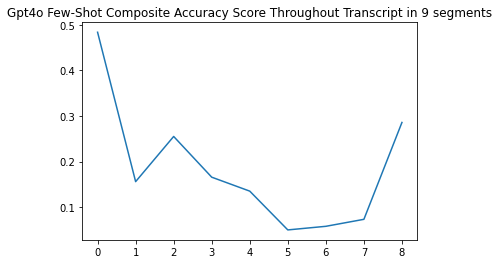

In [131]:
plot_segment_progression(path, run_names[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6

,segment,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline
segment,,,,,,,,,,,
0.0,0.0,0.607865,0.741234,0.698578,0.296043,0.819528,0.329049,0.759053,0.312546,0.590379,0.699514
1.0,1.0,0.472961,0.510478,0.574736,0.187893,0.599020,0.119997,0.586878,0.153945,0.512073,0.554983
2.0,2.0,0.401444,0.365515,0.518626,0.173956,0.366412,-1.179376,0.442519,-0.502710,0.466616,0.541823
3.0,3.0,0.312785,0.283207,0.502772,0.160535,0.447508,-0.256648,0.475140,-0.048057,0.453338,0.498428
4.0,4.0,0.299163,0.314736,0.470258,0.109555,0.438363,-0.014603,0.454311,0.047476,0.417369,0.393853
5.0,5.0,0.325084,0.261930,0.400507,0.089926,0.387104,-0.283690,0.393805,-0.096882,0.356692,0.468673
6.0,6.0,0.287942,0.167403,0.434692,0.122035,0.397447,0.083259,0.416069,0.102647,0.384260,0.344892
7.0,7.0,0.280529,0.171545,0.449593,0.134900,0.362991,-0.061805,0.406292,0.036548,0.387437,0.400615
8.0,8.0,0.281164,0.136003,0.383945,0.108781,0.338166,-0.018033,0.361056,0.045374,0.324205,0.341822


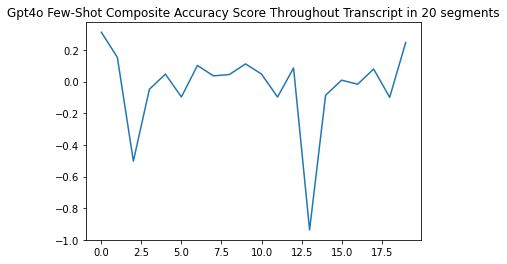

In [132]:
plot_segment_progression(path, run_names[1])

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]
Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64', name='segment')


,segment,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline
segment,,,,,,,,,,,
0.0,0.0,0.715617,0.834053,0.868652,0.459007,0.893910,0.292852,0.881281,0.375930,0.760807,0.664797
1.0,1.0,0.452109,0.478031,0.749464,0.365084,0.662113,-0.024374,0.705788,0.170355,0.654265,0.550607
2.0,2.0,0.341066,0.325217,0.688068,0.317666,0.532813,-0.251196,0.610441,0.033235,0.591353,0.512889
3.0,3.0,0.337762,0.239920,0.590471,0.238256,0.576000,0.184462,0.583236,0.211359,0.508911,0.480983
4.0,4.0,0.394763,0.382095,0.584850,0.153263,0.573811,0.336937,0.579330,0.245100,0.528264,0.370604
5.0,5.0,0.613506,0.570017,0.759486,0.355242,0.603946,0.246801,0.681716,0.301021,0.683301,0.500933


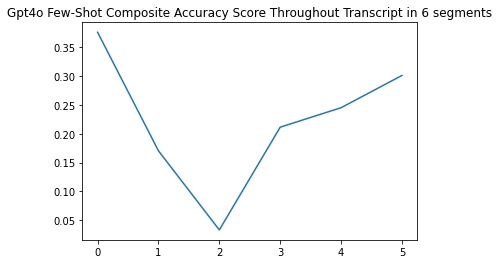

In [133]:
plot_segment_progression(path, run_names[2])

,segment,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline
segment,,,,,,,,,,,
0.0,0.0,0.607865,0.741234,0.698578,0.296043,0.819528,0.329049,0.759053,0.312546,0.590379,0.699514
1.0,1.0,0.472961,0.510478,0.574736,0.187893,0.599020,0.119997,0.586878,0.153945,0.512073,0.554983
2.0,2.0,0.401444,0.365515,0.518626,0.173956,0.366412,-1.179376,0.442519,-0.502710,0.466616,0.541823
3.0,3.0,0.312785,0.283207,0.502772,0.160535,0.447508,-0.256648,0.475140,-0.048057,0.453338,0.498428
4.0,4.0,0.299163,0.314736,0.470258,0.109555,0.438363,-0.014603,0.454311,0.047476,0.417369,0.393853
5.0,5.0,0.325084,0.261930,0.400507,0.089926,0.387104,-0.283690,0.393805,-0.096882,0.356692,0.468673
6.0,6.0,0.287942,0.167403,0.434692,0.122035,0.397447,0.083259,0.416069,0.102647,0.384260,0.344892
7.0,7.0,0.280529,0.171545,0.449593,0.134900,0.362991,-0.061805,0.406292,0.036548,0.387437,0.400615
8.0,8.0,0.281164,0.136003,0.383945,0.108781,0.338166,-0.018033,0.361056,0.045374,0.324205,0.341822


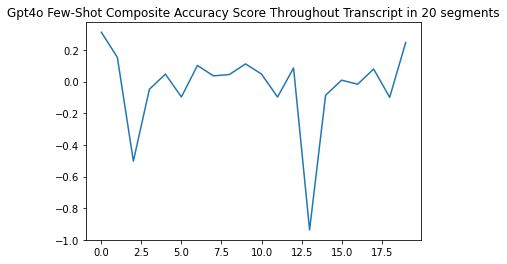

In [100]:
plot_segment_progression(path, run_names[3])

In [77]:
def plot_segment_progression_id(path: str, run_name: str):
    df = df_from_file_segments(path, run_name)
    num_segs = max([int(segment) for segment in df['segment']]) + 1

    segs = np.arange(num_segs)
    print("Segments:", segs)

    for id in set(df['ids']):
        segs = df[df['ids'==id]]['segments'].values
        vals = df[df['ids'] == id]['composite_normed'].values
        print(f"ID: {id}, Vals: {vals}")

        plt.figure()  # Start a new figure for each ID
        plt.title(f'{id} transcript progression')
        plt.ylim(-2, 1)
        
        if len(vals) == len(segs):
            plt.plot(segs, [float(val) for val in vals])
        else:
            print(f"Warning: Length mismatch for ID {id}. Skipping plot.")
    
        
        plt.show()

    return df

In [84]:
plot_segment_progression_id(path, run_names[0])

Segments: [0 1 2 3 4 5 6 7 8]


KeyError: False

In [131]:
def plot_segment_progression_all(path: str, run_name: str, ylim: tuple=(-0.5, 1)):
    df = df_from_file_segments(path, run_name)
    num_segs = max([int(segment) for segment in df['segment']]) + 1

    df['composite_normed'] = [float(val) for val in df['composite_normed']]

    for id in set(df['ids']):
        segs = df[df['ids']==id]['segment'].values
        segs = [int(seg) for seg in segs]
        vals = df[df['ids'] == id]['composite_normed'].values
        plt.title('transcript progression in ' + str(max(segs)+1) + ' segments')
        plt.ylim(-2, 1)

        print(segs, vals)
        
        if len(vals) == len(segs):
            plt.plot(segs, vals, color='lightblue', linestyle='dashed')
        else:
            print(f"Warning: Length mismatch for ID {id}. Skipping plot.")
    
    means = df.groupby('segment', as_index=False)['composite_normed'].mean()
    segments = np.array([int(seg) for seg in means['segment']])

    ind = np.argsort(segments)
    ind = [int(i) for i in ind]
    print(ind)

    plt.plot(segments[ind],np.array(means['composite_normed'])[ind], color='r')
    plt.ylim(ylim)
    plt.show()

    print(means)
    return means

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [ 0.3898273   0.08878243  0.1348025  -2.58542779  0.21694259  0.368869
  0.66655646  0.51330296 -0.21170531  0.03510157  0.03597575 -0.01615379
  0.00342385 -0.02021731  0.01420737 -0.0105554  -0.05674134  0.21132709
  0.05610121  0.23444787]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [ 0.21428835  0.07763034 -0.62381155 -0.21602917  0.0601217   0.06492393
  0.02763057 -0.25986261 -0.3240098   0.03298089  0.0176259   0.00345183
 -0.49551144  0.01207792 -0.00987453 -0.03422978 -0.00851578 -0.0556135
 -3.08381453  0.39953311]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [ 8.32207298e-02  9.25023220e-02 -6.83180363e+00  4.18079280e-01
  1.12537481e-01  9.01106044e-02  3.65635616e-02  3.11232208e-02
  6.76117057e-02 -1.82925572e-02 -1.87224708e-01  4.19671212e-02
  6.01371682e-02  7.31564065e-02 -8.33571179e-03  3.55060211e-02
 -1.08341490e-04  3.25666488e-02 -6.6996

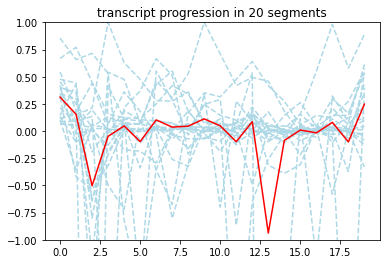

   segment  composite_normed
0        0          0.312546
1        1          0.153945
2       10          0.048003
3       11         -0.097441
4       12          0.086448
5       13         -0.937775
6       14         -0.085793
7       15          0.009390
8       16         -0.016247
9       17          0.079954
10      18         -0.099637
11      19          0.247574
12       2         -0.502710
13       3         -0.048057
14       4          0.047476
15       5         -0.096882
16       6          0.102647
17       7          0.036548
18       8          0.045374
19       9          0.112353


,segment,composite_normed
0,0,0.312546
1,1,0.153945
2,10,0.048003
3,11,-0.097441
4,12,0.086448
5,13,-0.937775
6,14,-0.085793
7,15,0.009390
8,16,-0.016247
9,17,0.079954


In [132]:
plot_segment_progression_all(path, run_names[3], ylim=(-1,1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [ 0.3898273   0.08878243  0.1348025  -2.58542779  0.21694259  0.368869
  0.66655646  0.51330296 -0.21170531  0.03510157  0.03597575 -0.01615379
  0.00342385 -0.02021731  0.01420737 -0.0105554  -0.05674134  0.21132709
  0.05610121  0.23444787]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [ 0.21428835  0.07763034 -0.62381155 -0.21602917  0.0601217   0.06492393
  0.02763057 -0.25986261 -0.3240098   0.03298089  0.0176259   0.00345183
 -0.49551144  0.01207792 -0.00987453 -0.03422978 -0.00851578 -0.0556135
 -3.08381453  0.39953311]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [ 8.32207298e-02  9.25023220e-02 -6.83180363e+00  4.18079280e-01
  1.12537481e-01  9.01106044e-02  3.65635616e-02  3.11232208e-02
  6.76117057e-02 -1.82925572e-02 -1.87224708e-01  4.19671212e-02
  6.01371682e-02  7.31564065e-02 -8.33571179e-03  3.55060211e-02
 -1.08341490e-04  3.25666488e-02 -6.6996

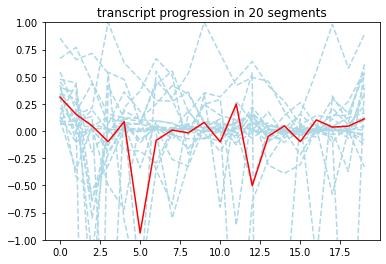

,ids,segment,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline,run_name
0,01_0542_298135,0,0.9281767955801105,0.9627507163323782,0.5202156334231807,0.07121956844487373,0.7003367003367004,0.06255064009074707,0.6102761668799406,0.066885,0.4834254143646409,0.6803418803418804,gpt4o-fsh-20-seg
1,01_0542_298135,1,0.8141025641025641,0.8989547038327527,0.2560386473429952,0.055214723926380466,0.2478386167146974,0.05840537944284341,0.2519386320288463,0.056810,0.2125603864734299,0.20118343195266272,gpt4o-fsh-20-seg
2,01_0542_298135,2,1.0,1.0,0.2833333333333333,0.03894009216589863,0.08534322820037106,0.03046382189239332,0.18433828076685219,0.034702,0.2542955326460481,0.05660377358490566,gpt4o-fsh-20-seg
3,01_0542_298135,3,0.6056338028169015,0.7543859649122807,0.36329588014981273,0.08229238591425524,0.07424593967517401,-0.45771721439207674,0.21877090991249337,-0.187712,0.3062015503875969,0.36492890995260663,gpt4o-fsh-20-seg
4,01_0542_298135,4,0.6971080669710807,0.7910714285714285,0.2507507507507507,0.011532616954303588,0.055734190782422297,0.04540305501417746,0.1532424707665865,0.028468,0.24200913242009137,0.010822510822510822,gpt4o-fsh-20-seg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,10_1005_331402,15,0.25531914893617025,0.05,0.24711316397228633,-0.044955005176395654,0.04465334900117509,-0.023504557134293995,0.1458832564867307,-0.034230,0.2795031055900621,0.06659267480577137,gpt4o-fsh-20-seg
396,10_1005_331402,16,0.2136181575433912,0.015384615384615385,0.2913752913752914,0.003278688524590209,0.042042042042042045,-0.020310251079481843,0.16670866670866671,-0.008516,0.289044289044289,0.06111111111111111,gpt4o-fsh-20-seg
397,10_1005_331402,17,0.2558714462299134,0.02922077922077922,0.2751322751322751,0.041815476190476146,0.09701492537313433,-0.15304247990815156,0.18607360025270472,-0.055614,0.2434988179669031,0.21686746987951808,gpt4o-fsh-20-seg
398,10_1005_331402,18,0.18447037701974867,0.005745062836624776,0.8076923076923077,0.1081593927893739,0.025119099177132957,-6.275788448313795,0.41640570343472033,-3.083815,0.7843698854337152,0.8660102739726028,gpt4o-fsh-20-seg


In [99]:
plot_segment_progression_all(path, run_names[3], ylim=(-1, 1))

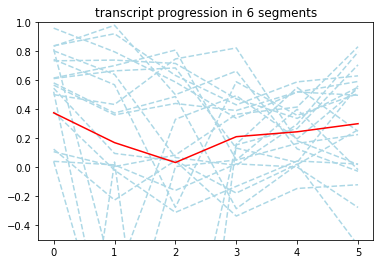

,ids,segment,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline,run_name
0,01_0542_298135,0,0.8668582375478927,0.9288274449564772,0.7211328976034859,0.04343322234554189,0.8411910669975186,0.03935577508310293,0.7811619823005023,0.041394,0.7084708470847085,0.8346849656893325,gpt4o-fsh-6-seg
1,01_0542_298135,1,0.871294287780188,0.9321334833145857,0.45905172413793105,0.018200176486559867,0.6990833001195695,0.015324934946235349,0.5790675121287503,0.016763,0.4490238611713666,0.6944,gpt4o-fsh-6-seg
2,01_0542_298135,2,0.7746606334841629,0.7235023041474654,0.2989690721649485,0.005597977846300575,0.03553581343697946,-0.3242572093517786,0.167252442800964,-0.159330,0.2950226244343891,0.27169421487603307,gpt4o-fsh-6-seg
3,01_0542_298135,3,0.5684210526315789,0.4438233650083846,0.2885245901639344,0.04533666759284983,0.03253922138291691,0.0025901867767496012,0.16053190577342566,0.023963,0.25473684210526315,0.030026809651474532,gpt4o-fsh-6-seg
4,01_0542_298135,4,0.6260047281323877,0.7662790697674419,0.27295788939624555,0.011764740406850403,0.02617801047120419,-0.007836470404963325,0.14956794993372485,0.001964,0.2643026004728133,0.03375,gpt4o-fsh-6-seg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10_1005_331402,1,0.28370221327967804,0.5032558139534884,0.5224550898203593,0.04054239082809987,0.03918613413715147,-2.8608313268513252,0.28082061197875535,-1.410144,0.5022761760242792,0.7511380880121397,gpt4o-fsh-6-seg
116,10_1005_331402,2,0.28033744321868914,0.11340941512125535,0.7569279493269992,0.12784090909090914,0.36494597839135656,-3.5314871711396414,0.5609369638591779,-1.701823,0.721298495645289,0.8598574821852731,gpt4o-fsh-6-seg
117,10_1005_331402,3,0.23295111647555822,0.1277249002149217,0.7577854671280277,0.24602480039853003,0.8013961605584642,0.07389174410493649,0.7795908138432459,0.159958,0.67875,0.7855500821018062,gpt4o-fsh-6-seg
118,10_1005_331402,4,0.2747681795998048,0.030497592295345103,0.7976633032395114,0.2789775797178416,0.889780631353665,0.8222384915843359,0.8437219672965882,0.550608,0.7193753050268423,0.3799593082400814,gpt4o-fsh-6-seg


In [105]:
plot_segment_progression_all(path, run_names[2])

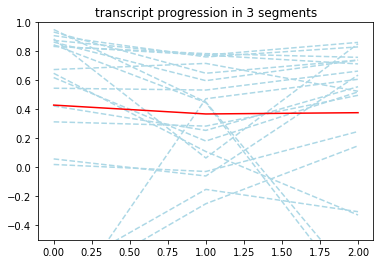

,ids,segment,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,composite,composite_normed,lev_baseline,diff_baseline,run_name
0,01_0542_298135,0,0.9806784027479605,0.9896148853310255,0.768462206776716,0.020449889555368264,0.8696711327649208,0.01870029375940372,0.8190666697708184,0.019575,0.7636284343654601,0.8671875,gpt4o-fsh-3-seg
1,01_0542_298135,1,0.7767509727626459,0.5533956071699065,0.3614253393665159,0.058171088764387896,0.35310895607529946,-0.11559300938650632,0.3572671477209077,-0.028711,0.32198443579766534,0.4201370585134423,gpt4o-fsh-3-seg
2,01_0542_298135,2,0.8459063282087951,0.912858249419055,0.8011620400258231,0.32603938730853405,0.2185205086870858,0.16799320908621468,0.5098412743564544,0.247016,0.7049709489993544,0.060729431721798136,gpt4o-fsh-3-seg
3,02_0036_174595,0,0.7788859158355631,0.8845479589281242,0.9582994855131329,0.7588877425379599,0.9785822854774078,0.9687113732432966,0.9684408854952704,0.863800,0.8270493797129652,0.31547924141465916,gpt4o-fsh-3-seg
4,02_0036_174595,1,0.34044556008785687,0.4319467554076539,0.8417553191489362,0.51653167311412,0.9134615384615384,0.6791628959276017,0.8776084288052373,0.597847,0.6726886291179597,0.7302729003596361,gpt4o-fsh-3-seg
5,02_0036_174595,2,0.677671166043259,0.5797661609817374,0.9407744874715261,0.588034302559292,0.9583481035093938,0.8909397339238898,0.94956129549046,0.739487,0.8562367864693446,0.6180836707152496,gpt4o-fsh-3-seg
6,03_0028_174553,0,0.7415110356536503,0.8620168430144677,0.9631657541065206,0.794842829018824,0.9808853118712274,0.8957972297847618,0.9720255329888741,0.845320,0.8204584040747029,0.8165625722877631,gpt4o-fsh-3-seg
7,03_0028_174553,1,0.4170212765957447,0.704518571090608,0.8139404159640247,0.40819602186147613,0.900868523510033,0.48440399196719697,0.8574044697370289,0.446300,0.6856060606060606,0.8077342047930284,gpt4o-fsh-3-seg
8,03_0028_174553,2,0.7225661226786719,0.6712395884370407,0.9211283822682786,0.5478875331959069,0.03145596165368484,-2.3798051149443413,0.4762921719609817,-0.915959,0.8255486775464266,0.7134319863403529,gpt4o-fsh-3-seg
9,04_0043_174686,0,0.7880939377389404,0.8803053435114504,0.7858257883234467,0.317401250513892,0.4024982650936849,0.3100290784334758,0.5941620267085659,0.313715,0.6862370289459312,0.13401896191547485,gpt4o-fsh-3-seg


In [106]:
plot_segment_progression_all(path, run_names[3])